PUC Minas - Pontifícia Universidade Católica de Minas Gerais

Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

Aluna: Lilian Campos Soares

Matrícula: 1092883

Este notebook é referente aos códigos elaborados em Python e utilizados no Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas.

In [4]:
#Carregamento de bibliotecas gerais
import pandas as pd 
import numpy as np
import seaborn as sns
import shutil
import os
import io
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [84]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [85]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [ ]:
#Instalação do Helium
!pip install helium

In [ ]:
#Instalação do Selenium
!pip install selenium

In [ ]:
#Carregamento de bibliotecas para a obtenção de arquivos
from time import sleep
from helium import click, kill_browser, start_chrome
from selenium import webdriver
import zipfile

In [ ]:
#Instalação e carregamento de bibliotecas para descompactar rar
!pip install pyunpack
from pyunpack import Archive
!pip install patool
import patoolib

In [ ]:
#Criação do recurso para download dos arquivos de SNV do DNIT
#O arquivo "SNV_201801B.xls" se refere aos dados de rodovias de 2017
#O arquivo "SNV_201903A.xls" se refere aos dados de rodovias de 2018
#O arquivo "SNV_202001A.xls" se refere aos dados de rodovias de 2019
#O arquivo "SNV_202101A.xls" se refere aos dados de rodovias de 2020
opts = webdriver.ChromeOptions()
opts.set_capability("loggingPrefs", {"performance": "ALL"})

driver = start_chrome("http://servicos.dnit.gov.br/dnitcloud/index.php/s/oTpPRmYs5AAdiNr?path=%2FSNV%20Planilhas%20(2011-Atual)%20(XLS)", options=opts)
sleep(12)
click("SNV_201801B.xls")
sleep(12)
click("SNV_201903A.xls")
sleep(12)
click("SNV_202001A.xls")
sleep(12)
click("SNV_202101A.xls")
sleep(12)kill_browser()

In [ ]:
#Armazenamento dos arquivos SNV no diretório do trabalho e exclusão dos arquivos baixados
path = r"C:\Users\lilia\Downloads\TCC PUC\xls"
os.mkdir(path)
shutil.copyfile(r"C:\Users\lilia\Downloads\SNV_201801B.xls", r"C:\Users\lilia\Downloads\TCC PUC\xls\SNV_201801B.xls")
shutil.copyfile(r"C:\Users\lilia\Downloads\SNV_201903A.xls", r"C:\Users\lilia\Downloads\TCC PUC\xls\SNV_201903A.xls")
shutil.copyfile(r"C:\Users\lilia\Downloads\SNV_202001A.xls", r"C:\Users\lilia\Downloads\TCC PUC\xls\SNV_202001A.xls")
shutil.copyfile(r"C:\Users\lilia\Downloads\SNV_202101A.xls", r"C:\Users\lilia\Downloads\TCC PUC\xls\SNV_202101A.xls")
os.remove(r"C:\Users\lilia\Downloads\SNV_201801B.xls")
os.remove(r"C:\Users\lilia\Downloads\SNV_201903A.xls")
os.remove(r"C:\Users\lilia\Downloads\SNV_202001A.xls")
os.remove(r"C:\Users\lilia\Downloads\SNV_202101A.xls")
#Como as planilhas possuíam figuras e células mescladas, foi feito um tratamento no excel e geradas tabelas em formato csv do "resumo do snv" e do "snv"

In [12]:
#Leitura dos arquivos resumo do SNV do DNIT
resumo_snv_2017 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2018_SNV201801B.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2018 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2019_SNV201903A.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2019 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2020_SNV202001A.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2020 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2021_SNV202101A.csv", sep=';', decimal=',', encoding = 'utf_8')

In [14]:
#Verificação das colunas que tem UF e a Extensão total em KM (sem as planejadas) em 2017, 2018, 2019 e 2020
#resumo_snv_2017.info()
#resumo_snv_2018.info()
#resumo_snv_2019.info()
#resumo_snv_2020.info()
print("Extensões de rodovias por UF - 2017")
resumo_snv_2017 = resumo_snv_2017.sort_values(by ='TOTAL_Sem_planejada', ascending=False)
print(resumo_snv_2017[['UF', 'TOTAL_Sem_planejada']])
print("Extensões de rodovias por UF - 2018")
resumo_snv_2018 = resumo_snv_2018.sort_values(by ='TOTAL_Sem_planejada', ascending=False)
print(resumo_snv_2018[['UF', 'TOTAL_Sem_planejada']])
print("Extensões de rodovias por UF - 2019")
resumo_snv_2019 = resumo_snv_2019.sort_values(by ='TOTAL_Sem_planejada', ascending=False)
print(resumo_snv_2019[['UF', 'TOTAL_Sem_planejada']])
print("Extensões de rodovias por UF - 2020")
resumo_snv_2020 = resumo_snv_2020.sort_values(by ='TOTAL_Sem_planejada', ascending=False)
print(resumo_snv_2020[['UF', 'TOTAL_Sem_planejada']])
#O resultado mostra que o estado de MG é o que possui a maior extensão de rodovias federais em KM em todos os anos

Extensões de rodovias por UF - 2017
    UF  TOTAL_Sem_planejada
10  MG              9577.00
4   BA              7061.00
22  RS              5799.40
13  PA              5122.00
12  MT              5084.10
17  PR              4053.40
11  MS              4041.30
8   GO              3695.80
9   MA              3263.90
16  PI              2876.20
5   CE              2550.60
2   AM              2366.60
23  SC              2352.10
15  PE              2248.30
20  RO              2118.90
26  TO              2117.20
18  RJ              1708.35
21  RR              1673.90
19  RN              1549.30
14  PB              1301.30
0   AC              1149.50
25  SP              1122.30
7   ES              1077.40
3   AP              1021.40
1   AL               801.20
24  SE               318.80
6   DF               207.26
Extensões de rodovias por UF - 2018
    UF  TOTAL_Sem_planejada
10  MG               8859.9
4   BA               7294.0
22  RS               5801.5
13  PA               5122.5
12  

In [ ]:
#Criação do recurso para download dos arquivos de Estimativa do Volume Médio Diário Anual – VMDa do DNIT (fluxo de veículos)
#O arquivo "Modelagem 2017_SNV_201801B" se refere aos dados de volume das rodovias de 2017
#O arquivo "Modelagem 2018_SNV_201903A" se refere aos dados de volume das rodovias de 2018
#O arquivo "Modelagem 2019_SNV_202001A" se refere aos dados de volume das rodovias de 2019 e também será usado para 2020 já que ainda não há modelagem mais recente
opts = webdriver.ChromeOptions()
opts.set_capability("loggingPrefs", {"performance": "ALL"})

driver = start_chrome("http://servicos.dnit.gov.br/dadospnct/Modelagem", options=opts)
sleep(12)
click("Estimativa VMDA 2019 (Excel)")
sleep(12)
kill_browser()
#Os arquivos de 2017 e 2018 não estavam mais disponíveis on-line na página do DNIT e foram obtidos em consulta por e-mail ao órgão (pnct@dnit.gov.br)

In [ ]:
#Armazenamento dos arquivos VMDA no diretório do trabalho e exclusão dos arquivos baixados
shutil.copyfile(r"C:\Users\lilia\Downloads\Modelagem 2019_SNV_202001A.xlsx", r"C:\Users\lilia\Downloads\TCC PUC\xls\Modelagem 2019_SNV_202001A.xlsx")
os.remove(r"C:\Users\lilia\Downloads\Modelagem 2019_SNV_202001A.xlsx")
#Os arquivos de 2017 e 2018 não estavam mais disponíveis on-line na página do DNIT e foram obtidos em consulta por e-mail ao órgão (pnct@dnit.gov.br)
#Após a obtenção dos arquivos de 2017 e 2018, os mesmos foram armazenados no diretório de trabalho

In [15]:
#Leitura dos arquivos VMDA do DNIT (como as sheet possuíam figuras e células mescladas, foi feito um tratamento no excel e gerada uma tabela em formato csv do resumo do VMDA)
resumo_vmda_2017 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Modelagem 2017_SNV_201801B_2.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_vmda_2018 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Modelagem 2018_SNV_201903A_2.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_vmda_2019_2020 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Modelagem 2019_SNV_202001A_2.csv", sep=';', decimal=',', encoding = 'utf_8')

In [84]:
#Verificação das colunas que tem UF e o volume total (fluxo) em VMDA em 2017, 2018 e 2019
#resumo_vmda_2017.info()
#resumo_vmda_2018.info()
#resumo_vmda_2019.info()
print("Volume médio diário anual - todos os segmentos - de rodovias por UF - 2017")
resumo_vmda_2017.groupby('UF')['VDMA_Total'].sum().sort_values(ascending=False)

Volume médio diário anual - todos os segmentos - de rodovias por UF - 2017


UF
SP    6307019
MG    5269878
RJ    4069878
PR    3290412
RS    2609081
SC    2358489
BA    2275256
GO    2200793
MT    1320847
DF    1297964
PE     924472
MS     899166
PI     887088
RN     876851
PB     771967
CE     762206
ES     678460
MA     591346
PA     563231
SE     482256
TO     450991
AL     450969
RO     381432
RR     190249
AM     145695
AC      62747
AP       9594
Name: VDMA_Total, dtype: int64

In [85]:
print("Volume médio diário anual - todos os segmentos - de rodovias por UF - 2018")
resumo_vmda_2018.groupby('UF')['VDMA_Total'].sum().sort_values(ascending=False)

Volume médio diário anual - todos os segmentos - de rodovias por UF - 2018


UF
SP    6331202
MG    4574966
RJ    3338999
PR    3042041
RS    2530327
SC    2463148
BA    2051661
GO    1473373
PE    1372884
DF    1277218
RN     826684
MT     807373
MS     800744
CE     787203
PB     765126
ES     649434
MA     611024
PI     594146
SE     415522
TO     390022
AL     375044
RO     335392
PA     332273
RR     166259
AM      86051
AC      57118
AP       2315
Name: VDMA_Total, dtype: int64

In [16]:
print("Volume médio diário anual - todos os segmentos - de rodovias por UF - 2019")
resumo_vmda_2019_2020.groupby('UF')['VDMA_Total'].sum().sort_values(ascending=False)
#O resultado mostra que, embora o estado de MG seja o de maior extensão de rodovias federais em KM, ele está em segundo lugar quanto ao fluxo de veículos (vmda)

Volume médio diário anual - todos os segmentos - de rodovias por UF - 2019


UF
SP    6409354
MG    5112368
RJ    3325640
PR    3218672
SC    3127813
RS    2846965
BA    2063995
GO    1652620
PE    1433085
DF    1347362
RN    1242710
PB    1218042
MT     851567
MS     819570
CE     774763
ES     730288
MA     605494
PI     574882
SE     417795
PA     415992
AL     382333
TO     374504
RO     364681
RR     164188
AM      85796
AC      61825
AP        816
Name: VDMA_Total, dtype: int64

In [ ]:
#Criação do recurso para download dos arquivos da PRF de registros de acidentes
opts = webdriver.ChromeOptions()
opts.set_capability("loggingPrefs", {"performance": "ALL"})

driver = start_chrome("https://arquivos.prf.gov.br/arquivos/index.php/s/nqvFu7xEF6HhbAq", options=opts)
sleep(3)
click("Baixar datatran2017.zip")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/MaC6cieXSFACNWT")
sleep(3)
click("Baixar datatran2018.zip")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN")
sleep(3)
click("Baixar datatran2019.zip")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/jdDLrQIf33xXSCe")
sleep(3)
click("Baixar datatran2020.zip")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/PYMCvPsVa3ZHspf")
sleep(3)
click("Baixar acidentes2017.rar")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/MJRqaDMQ27F60Ml")
sleep(3)
click("Baixar acidentes2018.zip")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/vw74viLA7WuZI4H")
sleep(3)
click("Baixar acidentes2019.zip")
sleep(12)

driver.get("https://arquivos.prf.gov.br/arquivos/index.php/s/35cUcYXWsrJd4tF")
sleep(3)
click("Baixar acidentes2020.zip")
sleep(12)
kill_browser()

In [ ]:
#Descompactação dos arquivos da PRF
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\datatran2017.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\datatran2018.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\datatran2019.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\datatran2020.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\acidentes2018.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\acidentes2019.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
descompactar = zipfile.ZipFile(r"C:\Users\lilia\Downloads\acidentes2020.zip")
descompactar.extractall(r"C:\Users\lilia\Downloads")
descompactar.close()
patoolib.extract_archive(r"C:\Users\lilia\Downloads\acidentes2017.rar", outdir=r"C:\Users\lilia\Downloads")

In [ ]:
#Armazenamento dos arquivos CSV no diretório do trabalho e exclusão dos arquivos baixados
path = r"C:\Users\lilia\Downloads\TCC PUC\csv"
os.mkdir(path)
shutil.copyfile(r"C:\Users\lilia\Downloads\datatran2017.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2017.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\datatran2018.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2018.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\datatran2019.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2019.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\datatran2020.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2020.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\acidentes2017.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2017.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\acidentes2018.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2018.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\acidentes2019.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2019.csv")
shutil.copyfile(r"C:\Users\lilia\Downloads\acidentes2020.csv", r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2020.csv")
os.remove(r"C:\Users\lilia\Downloads\datatran2017.csv")
os.remove(r"C:\Users\lilia\Downloads\datatran2018.csv")
os.remove(r"C:\Users\lilia\Downloads\datatran2019.csv")
os.remove(r"C:\Users\lilia\Downloads\datatran2020.csv")
os.remove(r"C:\Users\lilia\Downloads\acidentes2017.csv")
os.remove(r"C:\Users\lilia\Downloads\acidentes2018.csv")
os.remove(r"C:\Users\lilia\Downloads\acidentes2019.csv")
os.remove(r"C:\Users\lilia\Downloads\acidentes2020.csv")
os.remove(r"C:\Users\lilia\Downloads\datatran2017.zip")
os.remove(r"C:\Users\lilia\Downloads\datatran2018.zip")
os.remove(r"C:\Users\lilia\Downloads\datatran2019.zip")
os.remove(r"C:\Users\lilia\Downloads\datatran2020.zip")
os.remove(r"C:\Users\lilia\Downloads\acidentes2017.rar")
os.remove(r"C:\Users\lilia\Downloads\acidentes2018.zip")
os.remove(r"C:\Users\lilia\Downloads\acidentes2019.zip")
os.remove(r"C:\Users\lilia\Downloads\acidentes2020.zip")

In [17]:
#Junção dos arquivos datatran.CSV
a = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2017.csv", sep=';', decimal=',', encoding = 'cp1252')
b = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2018.csv", sep=';', decimal=',', encoding = 'cp1252')
c = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2019.csv", sep=';', decimal=',', encoding = 'cp1252')
d = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2020.csv", sep=';', decimal=',', encoding = 'cp1252')
abcd = pd.concat([a,b,c,d], join="inner")
abcd.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')
#abc.to_excel(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran.xlsx", index=False)

In [32]:
#Junção dos arquivos acidentes.CSV
e = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2017.csv", sep=';', decimal=',', encoding = 'cp1252')
f = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2018.csv", sep=';', decimal=',', encoding = 'cp1252')
g = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2019.csv", sep=';', decimal=',', encoding = 'cp1252')
h = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes2020.csv", sep=';', decimal=',', encoding = 'cp1252')
efgh = pd.concat([e,f,g,h], join="inner")
efgh.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')
#efgh.to_excel(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes.xlsx", index=False)

In [32]:
#Verificação dos arquivos datatran.CSV: importação e visualização das dimensões
datatran_original = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran.csv", sep=';', decimal=',', encoding = 'cp1252')

In [6]:
#Verificação dos arquivos datatran.CSV: quantidade de linhas e colunas do dataframe
datatran_original.shape

(289751, 30)

In [7]:
#Verificação dos arquivos datatran.CSV: descrição do index
datatran_original.index

RangeIndex(start=0, stop=289751, step=1)

In [8]:
#Verificação dos arquivos datatran.CSV: colunas presentes
datatran_original.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'], dtype='object')

In [9]:
#Verificação dos arquivos datatran.CSV: tipos e formatos dos dados
datatran_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289751 entries, 0 to 289750
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      289751 non-null  float64
 1   data_inversa            289751 non-null  object 
 2   dia_semana              289751 non-null  object 
 3   horario                 289751 non-null  object 
 4   uf                      289751 non-null  object 
 5   br                      289241 non-null  float64
 6   km                      289241 non-null  float64
 7   municipio               289751 non-null  object 
 8   causa_acidente          289751 non-null  object 
 9   tipo_acidente           289751 non-null  object 
 10  classificacao_acidente  289751 non-null  object 
 11  fase_dia                289751 non-null  object 
 12  sentido_via             289751 non-null  object 
 13  condicao_metereologica  289751 non-null  object 
 14  tipo_pista          

In [10]:
#Verificação dos arquivos datatran.CSV: contagem de dados não nulos
datatran_original.count()

id                        289751
data_inversa              289751
dia_semana                289751
horario                   289751
uf                        289751
br                        289241
km                        289241
municipio                 289751
causa_acidente            289751
tipo_acidente             289751
classificacao_acidente    289751
fase_dia                  289751
sentido_via               289751
condicao_metereologica    289751
tipo_pista                289751
tracado_via               289751
uso_solo                  289751
pessoas                   289751
mortos                    289751
feridos_leves             289751
feridos_graves            289751
ilesos                    289751
ignorados                 289751
feridos                   289751
veiculos                  289751
latitude                  289751
longitude                 289751
regional                  289751
delegacia                 289751
uop                       278661
dtype: int

In [11]:
#Verificação dos arquivos datatran.CSV: valores únicos
datatran_original.nunique()

id                        289751
data_inversa                1461
dia_semana                     7
horario                     1436
uf                            27
br                           128
km                          9542
municipio                   2004
causa_acidente                52
tipo_acidente                 19
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
pessoas                       65
mortos                        15
feridos_leves                 43
feridos_graves                23
ilesos                        57
ignorados                     14
feridos                       48
veiculos                      17
latitude                  187576
longitude                 188657
regional                      28
delegacia                    214
uop                          126
dtype: int

In [12]:
#Verificação dos arquivos datatran.CSV: valores nulos / NaN nas colunas
datatran_original.isnull().sum()

id                            0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          510
km                          510
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
pessoas                       0
mortos                        0
feridos_leves                 0
feridos_graves                0
ilesos                        0
ignorados                     0
feridos                       0
veiculos                      0
latitude                      0
longitude                     0
regional                      0
delegacia                     0
uop                       11090
dtype: int64

In [13]:
#Verificação dos arquivos datatran.CSV: amostra das primeiras 10 linhas
datatran_original.head(10)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8.0,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,1,0,0,1,0,0,1,1,-23.0988,-52.3879,SR-PR,DEL7/7,UOP05/PR
1,9.0,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1,0,0,0,1,0,0,1,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,2,0,2,0,0,0,2,1,-23.3695,309.9351,SR-PR,DEL7/7,UOP07/PR
3,12.0,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1,0,0,1,0,0,1,1,-16.2747,-48.9691,SR-GO,DEL1/2,UOP01/GO
4,13.0,2017-01-01,domingo,00:00:00,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,1,0,1,0,0,0,1,1,-26.4468,-49.2017,SR-SC,DEL8/6,UOP03/SC
5,14.0,2017-01-01,domingo,00:40:00,GO,60.0,188.0,GUAPO,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,2,0,1,0,1,0,1,2,-16.8249,-49.5352,SR-GO,DEL1/1,UOP02/GO
6,15.0,2017-01-01,domingo,00:01:00,PB,104.0,3.4,NOVA FLORESTA,Ingestão de Álcool,Tombamento,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Sim,1,1,0,0,0,0,0,1,-6.4622,-36.1899,SR-PB,DEL14/2,UOP04/PB
7,16.0,2017-01-01,domingo,00:30:00,TO,153.0,141.7,ARAGUAINA,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Ignorado,Múltipla,Reta,Sim,4,0,2,0,1,1,2,2,-7.1867,-48.2297,SR-TO,UOP04/TO,NaN
8,17.0,2017-01-01,domingo,01:45:00,RS,116.0,34.9,VACARIA,Defeito Mecânico no Veículo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,6,0,4,0,2,0,4,2,-28.5071,-50.9412,SR-RS,DEL9/5,UOP03/RS
9,18.0,2017-01-01,domingo,01:40:00,RS,290.0,722.0,URUGUAIANA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,2,0,2,0,0,0,2,1,-29.7561,-57.0646,SR-RS,DEL9/13,UOP01/RS


In [14]:
#Verificação dos arquivos datatran.CSV: amostra das últimas 10 linhas
datatran_original.tail(10)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
289741,334566.0,2020-12-16,quarta-feira,17:40:00,PA,230.0,2.0,PALESTINA DO PARA,Desobediência às normas de trânsito pelo condutor,Colisão com objeto estático,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Reta,Não,2,0,0,1,1,0,1,2,-5.6963,-48.3422,SR-PA,UOP01,DEL03
289742,334658.0,2020-12-19,sábado,03:50:00,AC,364.0,108.0,RIO BRANCO,Defeito na Via,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Nublado,Simples,Reta,Não,4,0,3,1,0,0,4,1,-10.0211,-67.6492,SR-AC,UOP01,DEL01
289743,334662.0,2020-12-18,sexta-feira,03:20:00,SP,116.0,470.0,PARIQUERA-ACU,Avarias e/ou desgaste excessivo no pneu,Incêndio,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,2,0,0,0,1,1,0,1,-24.6540,-47.9595,SR-SP,UOP01,DEL05
289744,334668.0,2020-12-19,sábado,04:55:00,MG,153.0,7.9,ARAPORA,Objeto estático sobre o leito carroçável,Colisão com objeto estático,Sem Vítimas,Amanhecer,Crescente,Céu Claro,Dupla,Reta,Não,1,0,0,0,1,0,0,1,-18.4787,-49.1884,SR-MG,UOP03,DEL15
289745,334691.0,2020-11-13,sexta-feira,08:20:00,RO,364.0,409.0,JARU,Falta de Atenção à Condução,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Sol,Simples,Curva,Não,1,0,1,0,0,0,1,1,-10.5402,-62.3933,SR-RO,UOP02,DEL03
289746,334713.0,2020-12-23,quarta-feira,13:58:00,PA,316.0,62.0,CASTANHAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,3,0,1,0,2,0,1,2,-1.2979,-47.9376,SR-PA,UOP01,DEL01
289747,334777.0,2020-12-19,sábado,23:00:00,PA,316.0,106.0,SANTA MARIA DO PARA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,2,0,1,0,1,0,1,2,-1.3410,-47.5512,SR-PA,UOP02,DEL01
289748,334780.0,2020-12-08,terça-feira,06:10:00,PR,116.0,90.9,PIRAQUARA,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Múltipla,Reta,Não,3,0,2,0,1,0,2,2,-25.4611,-49.0888,SR-PR,UOP01,DEL01
289749,334788.0,2020-12-31,quinta-feira,22:30:00,SC,101.0,146.9,ITAPEMA,Avarias e/ou desgaste excessivo no pneu,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Curva,Sim,1,1,0,0,0,0,0,1,-27.0913,-48.6167,SR-SC,UOP03,DEL04
289750,334959.0,2020-11-18,quarta-feira,18:00:00,AL,104.0,90.3,RIO LARGO,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,0,0,2,0,0,2,1,-9.5006,-35.8113,SR-AL,UOP01,DEL01


In [70]:
#Verificação dos arquivos acidentes.CSV: importação e visualização das dimensões
acidentes_original = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes.csv", sep=';', decimal=',', encoding = 'cp1252')

In [16]:
#Verificação dos arquivos acidentes.CSV: quantidade de linhas e colunas do dataframe
acidentes_original.shape

(678942, 35)

In [17]:
#Verificação dos arquivos acidentes.CSV: descrição do index
acidentes_original.index

RangeIndex(start=0, stop=678942, step=1)

In [18]:
#Verificação dos arquivos acidentes.CSV: colunas presentes
acidentes_original.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop'], dtype='object')

In [19]:
#Verificação dos arquivos acidentes.CSV: tipos e formatos dos dados
acidentes_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678942 entries, 0 to 678941
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      678942 non-null  float64
 1   pesid                   678938 non-null  float64
 2   data_inversa            678942 non-null  object 
 3   dia_semana              678942 non-null  object 
 4   horario                 678942 non-null  object 
 5   uf                      678942 non-null  object 
 6   br                      677754 non-null  float64
 7   km                      677754 non-null  float64
 8   municipio               678942 non-null  object 
 9   causa_acidente          678942 non-null  object 
 10  tipo_acidente           678942 non-null  object 
 11  classificacao_acidente  678942 non-null  object 
 12  fase_dia                678942 non-null  object 
 13  sentido_via             678942 non-null  object 
 14  condicao_metereologi

In [20]:
#Verificação dos arquivos acidentes.CSV: contagem de dados não-nulos
acidentes_original.count()

id                        678942
pesid                     678938
data_inversa              678942
dia_semana                678942
horario                   678942
uf                        678942
br                        677754
km                        677754
municipio                 678942
causa_acidente            678942
tipo_acidente             678942
classificacao_acidente    678942
fase_dia                  678942
sentido_via               678942
condicao_metereologica    678942
tipo_pista                678942
tracado_via               678942
uso_solo                  678942
id_veiculo                678938
tipo_veiculo              678942
marca                     645500
ano_fabricacao_veiculo    639545
tipo_envolvido            678942
estado_fisico             678942
idade                     615749
sexo                      678942
ilesos                    678942
feridos_leves             678942
feridos_graves            678942
mortos                    678942
latitude  

In [21]:
#Verificação dos arquivos acidentes.CSV: valores únicos
acidentes_original.nunique()

id                        289751
pesid                     678938
data_inversa                1461
dia_semana                     7
horario                     1436
uf                            27
br                           128
km                          9542
municipio                   2004
causa_acidente                52
tipo_acidente                 19
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                475203
tipo_veiculo                  25
marca                       8517
ano_fabricacao_veiculo        70
tipo_envolvido                 6
estado_fisico                  5
idade                        197
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_graves                 2
mortos                         2
latitude  

In [22]:
#Verificação dos arquivos acidentes.CSV: valores nulos / NaN nas colunas
acidentes_original.isnull().sum()

id                            0
pesid                         4
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                         1188
km                         1188
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    4
tipo_veiculo                  0
marca                     33442
ano_fabricacao_veiculo    39397
tipo_envolvido                0
estado_fisico                 0
idade                     63193
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

In [23]:
#Verificação dos arquivos acidentes.CSV: amostra das primeiras 10 linhas
acidentes_original.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8.0,1.0,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,Não,5.0,Motocicleta,HONDA/CG 150 TITAN ESD,2005.0,Condutor,Lesões Graves,19.0,Masculino,0,0,1,0,-23.0988,-52.3879,SR-PR,DEL7/7,UOP05/PR
1,9.0,955.0,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,7.0,Automóvel,FIAT/PALIO WEEKEND EX,2003.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-27.8101,-48.6357,SR-SC,DEL8/1,UOP02/SC
2,11.0,3.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,6.0,Automóvel,VW/NOVO GOL 1.0,2013.0,Passageiro,Lesões Leves,27.0,Masculino,0,1,0,0,-23.3695,309.9351,SR-PR,DEL7/7,UOP07/PR
3,11.0,2.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,6.0,Automóvel,VW/NOVO GOL 1.0,2013.0,Condutor,Lesões Leves,27.0,Feminino,0,1,0,0,-23.3695,309.9351,SR-PR,DEL7/7,UOP07/PR
4,12.0,1499.0,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,8.0,Motocicleta,KASINSKI/COMET 250,2011.0,Condutor,Lesões Graves,24.0,Masculino,0,0,1,0,-16.2747,-48.9691,SR-GO,DEL1/2,UOP01/GO
5,13.0,1892.0,2017-01-01,domingo,00:00:00,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Não Informado,Não,4.0,Automóvel,GM/CORSA SEDAN,2004.0,Condutor,Lesões Leves,57.0,Masculino,0,1,0,0,-26.4468,-49.2017,SR-SC,DEL8/6,UOP03/SC
6,14.0,1563.0,2017-01-01,domingo,00:40:00,GO,60.0,188.0,GUAPO,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,1310.0,Motocicleta,HONDA/CG 125 TITAN,1998.0,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,-16.8249,-49.5352,SR-GO,DEL1/1,UOP02/GO
7,14.0,1558.0,2017-01-01,domingo,00:40:00,GO,60.0,188.0,GUAPO,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta,Sim,1309.0,Automóvel,RENAULT/CLIO RN 1.0 16V,2002.0,Condutor,Ileso,35.0,Masculino,1,0,0,0,-16.8249,-49.5352,SR-GO,DEL1/1,UOP02/GO
8,15.0,555.0,2017-01-01,domingo,00:01:00,PB,104.0,3.4,NOVA FLORESTA,Ingestão de Álcool,Tombamento,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Sim,140.0,Motocicleta,HONDA/CG 125 TITAN,1996.0,Condutor,Óbito,49.0,Masculino,0,0,0,1,-6.4622,-36.1899,SR-PB,DEL14/2,UOP04/PB
9,16.0,990.0,2017-01-01,domingo,00:30:00,TO,153.0,141.7,ARAGUAINA,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Ignorado,Múltipla,Reta,Sim,373.0,Motoneta,NaN,NaN,Passageiro,Lesões Leves,13.0,Masculino,0,1,0,0,-7.1867,-48.2297,SR-TO,UOP04/TO,NaN


In [24]:
#Verificação dos arquivos acidentes.CSV: amostra das últimas 10 linhas
acidentes_original.tail(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
678932,334668.0,745244.0,2020-12-19,sábado,04:55:00,MG,153.0,7.9,ARAPORA,Objeto estático sobre o leito carroçável,Colisão com objeto estático,Sem Vítimas,Amanhecer,Crescente,Céu Claro,Dupla,Reta,Não,600448.0,Caminhonete,I/VW AMAROK CD 4X4 HIGH,2019.0,Condutor,Ileso,56.0,Masculino,1,0,0,0,-18.4787,-49.1884,SR-MG,UOP03,DEL15
678933,334713.0,745335.0,2020-12-23,quarta-feira,13:58:00,PA,316.0,62.0,CASTANHAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,600541.0,Motocicleta,NaN,NaN,Condutor,Ileso,27.0,Masculino,1,0,0,0,-1.2979,-47.9376,SR-PA,UOP01,DEL01
678934,334713.0,745336.0,2020-12-23,quarta-feira,13:58:00,PA,316.0,62.0,CASTANHAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,600540.0,Motocicleta,HONDA/CG 160 FAN,2018.0,Passageiro,Ileso,24.0,Feminino,1,0,0,0,-1.2979,-47.9376,SR-PA,UOP01,DEL01
678935,334713.0,745334.0,2020-12-23,quarta-feira,13:58:00,PA,316.0,62.0,CASTANHAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,600540.0,Motocicleta,HONDA/CG 160 FAN,2018.0,Condutor,Lesões Leves,26.0,Masculino,0,1,0,0,-1.2979,-47.9376,SR-PA,UOP01,DEL01
678936,334777.0,745470.0,2020-12-19,sábado,23:00:00,PA,316.0,106.0,SANTA MARIA DO PARA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,600682.0,Automóvel,VW/VOYAGE 1.6L MB5,2018.0,Condutor,Lesões Leves,36.0,Masculino,0,1,0,0,-1.3410,-47.5512,SR-PA,UOP02,DEL01
678937,334780.0,745479.0,2020-12-08,terça-feira,06:10:00,PR,116.0,90.9,PIRAQUARA,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Múltipla,Reta,Não,600686.0,Caminhonete,RENAULT/MASTER FUR L3H2,2017.0,Passageiro,Lesões Leves,NaN,Masculino,0,1,0,0,-25.4611,-49.0888,SR-PR,UOP01,DEL01
678938,334780.0,745478.0,2020-12-08,terça-feira,06:10:00,PR,116.0,90.9,PIRAQUARA,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Múltipla,Reta,Não,600686.0,Caminhonete,RENAULT/MASTER FUR L3H2,2017.0,Condutor,Lesões Leves,53.0,Masculino,0,1,0,0,-25.4611,-49.0888,SR-PR,UOP01,DEL01
678939,334788.0,745498.0,2020-12-31,quinta-feira,22:30:00,SC,101.0,146.9,ITAPEMA,Avarias e/ou desgaste excessivo no pneu,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Curva,Sim,600699.0,Automóvel,PEUGEOT/206 14 SENSAT FX,2006.0,Condutor,Óbito,40.0,Masculino,0,0,0,1,-27.0913,-48.6167,SR-SC,UOP03,DEL04
678940,334959.0,745884.0,2020-11-18,quarta-feira,18:00:00,AL,104.0,90.3,RIO LARGO,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,600975.0,Ciclomotor,I/HAOJIAN AVELLOZ AZ1,2018.0,Pedestre,Lesões Graves,NaN,Feminino,0,0,1,0,-9.5006,-35.8113,SR-AL,UOP01,DEL01
678941,334959.0,745883.0,2020-11-18,quarta-feira,18:00:00,AL,104.0,90.3,RIO LARGO,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,600975.0,Ciclomotor,I/HAOJIAN AVELLOZ AZ1,2018.0,Condutor,Lesões Graves,48.0,Masculino,0,0,1,0,-9.5006,-35.8113,SR-AL,UOP01,DEL01


In [43]:
#Verificação de dados de acidentes por UF: para definição da UF objeto do estudo
print("Totais de acidentes por UF - 2017")
a = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2017.csv", sep=';', decimal=',', encoding = 'cp1252')
a.groupby('uf')['id'].count().sort_values(ascending=False)

#MG é a UF que apresentou a maior quantidade de registros de ocorrências de acidentes em 2017

Totais de acidentes por UF - 2017


uf
MG    12730
PR    10689
SC    10665
RS     6386
SP     6011
RJ     5969
BA     4687
GO     4369
MT     3526
PE     3441
ES     3004
CE     1954
MS     1933
PB     1852
RO     1831
MA     1583
PI     1540
PA     1504
RN     1457
DF     1093
AL      904
TO      785
SE      763
AC      304
RR      286
AP      166
AM      131
Name: id, dtype: int64

In [44]:
print("Totais de acidentes por UF - 2018")
b = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2018.csv", sep=';', decimal=',', encoding = 'cp1252')
b.groupby('uf')['id'].count().sort_values(ascending=False)

#MG é a UF que apresentou a maior quantidade de registros de ocorrências de acidentes em 2018

Totais de acidentes por UF - 2018


uf
MG    9066
SC    8497
PR    7952
RJ    4575
SP    4516
RS    4445
BA    3555
GO    3464
PE    2715
ES    2642
MT    2631
CE    1697
RO    1629
PB    1588
MS    1530
RN    1416
PI    1371
MA    1272
PA    1260
DF     867
AL     691
TO     589
SE     559
RR     236
AC     235
AP     173
AM     124
Name: id, dtype: int64

In [45]:
print("Totais de acidentes por UF - 2019")
c = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2019.csv", sep=';', decimal=',', encoding = 'cp1252')
c.groupby('uf')['id'].count().sort_values(ascending=False)

#MG é a UF que apresentou a maior quantidade de registros de ocorrências de acidentes em 2019

Totais de acidentes por UF - 2019


uf
MG    8720
SC    8428
PR    7708
RJ    4606
RS    4595
SP    4377
BA    3471
GO    3354
ES    2842
PE    2736
MT    2137
CE    1694
PB    1564
RO    1533
RN    1437
MS    1435
PI    1346
DF    1090
MA    1075
PA     817
AL     629
SE     612
TO     520
AC     254
RR     237
AP     128
AM     101
Name: id, dtype: int64

In [46]:
print("Totais de acidentes por UF - 2020")
d = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2020.csv", sep=';', decimal=',', encoding = 'cp1252')
d.groupby('uf')['id'].count().sort_values(ascending=False)

#MG é a UF que apresentou a maior quantidade de registros de ocorrências de acidentes em 2020

Totais de acidentes por UF - 2020


uf
MG    8363
SC    7217
PR    7168
RJ    4222
RS    4176
SP    4040
BA    3443
GO    3226
PE    2557
ES    2530
MT    2189
CE    1569
MS    1539
RO    1485
PB    1401
RN    1333
PI    1200
MA    1151
DF    1040
PA     959
AL     628
TO     595
SE     574
AC     300
RR     250
AP     155
AM     137
Name: id, dtype: int64

In [47]:
#Verificação de dados de acidentes por UF: para definição da UF objeto do estudo
abcd = pd.concat([a,b,c,d], join="inner")
abcd.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2.csv", index=False)
datatran_abcd = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran2.csv", sep=',', decimal='.', encoding = 'utf_8')
print("Total de acidentes por UF - 2017 a 2020")
datatran_abcd.groupby('uf')['id'].count().sort_values(ascending=False)

#MG é a UF com a maior quantidade de registros de ocorrências de acidentes em todos os anos
#(a contagem neste ponto inclui registros que tem algum campo nulo ('0' / NaN))

#Conclusão: MG é o de maior extensão rodoviária federal, com a maior quantidade de acidentes por ano e em segundo lugar em volume de tráfego

Total de acidentes por UF - 2017 a 2020


uf
MG    38879
SC    34807
PR    33517
RS    19602
RJ    19372
SP    18944
BA    15156
GO    14413
PE    11449
ES    11018
MT    10483
CE     6914
RO     6478
MS     6437
PB     6405
RN     5643
PI     5457
MA     5081
PA     4540
DF     4090
AL     2852
SE     2508
TO     2489
AC     1093
RR     1009
AP      622
AM      493
Name: id, dtype: int64

In [48]:
#Verificação de dados de acidentes por UF: tabela resumo por UF com indicadores (acidente/km; mortes/km)

print("Tabela resumo por UF - Indicadores com base em dados de 2017")
a.groupby('uf', as_index = False)['id'].count()
acidentes_2017 = pd.DataFrame(a.groupby('uf', as_index = False)['id'].count()).reset_index()
acidentes_2017.rename(columns={'id':'acidentes'}, inplace=True)
acidentes_2017.rename(columns={'uf':'UF'}, inplace=True)
acidentes_2017.drop(columns=['index'], axis=1, inplace=True)

a.groupby('uf', as_index = False)['mortos'].sum()
mortes_2017 = pd.DataFrame(a.groupby('uf', as_index = False) ['mortos'].sum()).reset_index()
mortes_2017.rename(columns={'mortos':'mortes'}, inplace=True)
mortes_2017.rename(columns={'uf':'UF'}, inplace=True)
mortes_2017.drop(columns=['index'], axis=1, inplace=True)

#print(acidentes_2017)
#print(mortes_2017)
acidentes_2017.drop(columns=['UF'], axis=1, inplace=True)
mortes_2017.drop(columns=['UF'], axis=1, inplace=True)

resumo_snv_2017_2 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2018_SNV201801B.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2017_2.drop(columns=['PLANEJADA','RNP_TRAVESSIA','RNP_LEITO_NATUAL','RNP_EM_OBRAS_IMP','RNP_IMPLANT','RNP_EM_OBRAS_PAV','RNP_SUBTOTAL','RP_PISTA_SIMPLES','RP_EM_OBRAS_DUP','RP_PISTA_DUPLA','RP_SUBTOTAL','TOTAL'], axis=1, inplace=True)
resumo_snv_2017_2['acidentes_km'] = '0'
resumo_snv_2017_2['mortes_km'] = '0'
resumo_snv_2017_2['acidentes_km'] = resumo_snv_2017_2.acidentes_km.astype('float64')
resumo_snv_2017_2['mortes_km'] = resumo_snv_2017_2.mortes_km.astype('float64')
resumo_snv_2017_2.rename(columns={'TOTAL_Sem_planejada':'km_rodovia'}, inplace=True)

temp = pd.concat([acidentes_2017, resumo_snv_2017_2], axis=1, sort=False).reset_index()
resumo_uf_2017 = pd.concat([temp, mortes_2017], axis =1, sort = False).reset_index()

resumo_uf_2017['acidentes_km'] = resumo_uf_2017['acidentes']/resumo_uf_2017['km_rodovia']
resumo_uf_2017['mortes_km'] = resumo_uf_2017['mortes']/resumo_uf_2017['km_rodovia']
resumo_uf_2017.drop(columns=['level_0'], axis=1, inplace=True)
resumo_uf_2017.drop(columns=['index'], axis=1, inplace=True)
resumo_uf_2017 = resumo_uf_2017.reindex(columns=['UF', 'km_rodovia', 'acidentes', 'acidentes_km', 'mortes', 'mortes_km'])
print(resumo_uf_2017)
resumo_uf_2017.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\resumo_uf_2017.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')

#Em 2017, SP apresentou o mais alto índice de acidente/Km, seguido do DF, SC e RJ.

Tabela resumo por UF - Indicadores com base em dados de 2017
    UF  km_rodovia  acidentes  acidentes_km  mortes  mortes_km
0   AC     1149.50        304        0.2645      18     0.0157
1   AL      801.20        904        1.1283     102     0.1273
2   AM     2366.60        131        0.0554      14     0.0059
3   AP     1021.40        166        0.1625       9     0.0088
4   BA     7061.00       4687        0.6638     594     0.0841
5   CE     2550.60       1954        0.7661     190     0.0745
6   DF      207.26       1093        5.2736      46     0.2219
7   ES     1077.40       3004        2.7882     201     0.1866
8   GO     3695.80       4369        1.1822     344     0.0931
9   MA     3263.90       1583        0.4850     246     0.0754
10  MG     9577.00      12730        1.3292     869     0.0907
11  MS     4041.30       1933        0.4783     162     0.0401
12  MT     5084.10       3526        0.6935     191     0.0376
13  PA     5122.00       1504        0.2936     162     0

In [49]:
print("Tabela resumo por UF - Indicadores com base em dados de 2018")
b.groupby('uf', as_index = False)['id'].count()
acidentes_2018 = pd.DataFrame(b.groupby('uf', as_index = False)['id'].count()).reset_index()
acidentes_2018.rename(columns={'id':'acidentes'}, inplace=True)
acidentes_2018.rename(columns={'uf':'UF'}, inplace=True)
acidentes_2018.drop(columns=['index'], axis=1, inplace=True)

b.groupby('uf', as_index = False)['mortos'].sum()
mortes_2018 = pd.DataFrame(b.groupby('uf', as_index = False) ['mortos'].sum()).reset_index()
mortes_2018.rename(columns={'mortos':'mortes'}, inplace=True)
mortes_2018.rename(columns={'uf':'UF'}, inplace=True)
mortes_2018.drop(columns=['index'], axis=1, inplace=True)

#print(acidentes_2018)
#print(mortes_2018)
acidentes_2018.drop(columns=['UF'], axis=1, inplace=True)
mortes_2018.drop(columns=['UF'], axis=1, inplace=True)

resumo_snv_2018_2 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2019_SNV201903A.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2018_2.drop(columns=['PLANEJADA','RNP_TRAVESSIA','RNP_LEITO_NATUAL','RNP_EM_OBRAS_IMP','RNP_IMPLANT','RNP_EM_OBRAS_PAV','RNP_SUBTOTAL','RP_PISTA_SIMPLES','RP_EM_OBRAS_DUP','RP_PISTA_DUPLA','RP_SUBTOTAL','TOTAL'], axis=1, inplace=True)
resumo_snv_2018_2['acidentes_km'] = '0'
resumo_snv_2018_2['mortes_km'] = '0'
resumo_snv_2018_2['acidentes_km'] = resumo_snv_2018_2.acidentes_km.astype('float64')
resumo_snv_2018_2['mortes_km'] = resumo_snv_2018_2.mortes_km.astype('float64')
resumo_snv_2018_2.rename(columns={'TOTAL_Sem_planejada':'km_rodovia'}, inplace=True)

temp = pd.concat([acidentes_2018, resumo_snv_2018_2], axis=1, sort=False).reset_index()
resumo_uf_2018 = pd.concat([temp, mortes_2018], axis =1, sort = False).reset_index()

resumo_uf_2018['acidentes_km'] = resumo_uf_2018['acidentes']/resumo_uf_2018['km_rodovia']
resumo_uf_2018['mortes_km'] = resumo_uf_2018['mortes']/resumo_uf_2018['km_rodovia']
resumo_uf_2018.drop(columns=['level_0'], axis=1, inplace=True)
resumo_uf_2018.drop(columns=['index'], axis=1, inplace=True)
resumo_uf_2018 = resumo_uf_2018.reindex(columns=['UF', 'km_rodovia', 'acidentes', 'acidentes_km', 'mortes', 'mortes_km'])
print(resumo_uf_2018)
resumo_uf_2018.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\resumo_uf_2018.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')

#Em 2018, DF apresentou o mais alto índice de acidente/Km, seguido do SP, SC e RJ.

Tabela resumo por UF - Indicadores com base em dados de 2018
    UF  km_rodovia  acidentes  acidentes_km  mortes  mortes_km
0   AC      1177.8        235        0.1995      26     0.0221
1   AL       801.2        691        0.8625      91     0.1136
2   AM      2367.6        124        0.0524      17     0.0072
3   AP      1021.4        173        0.1694      15     0.0147
4   BA      7294.0       3555        0.4874     456     0.0625
5   CE      2557.8       1697        0.6635     180     0.0704
6   DF       203.3        867        4.2646      44     0.2164
7   ES      1083.9       2642        2.4375     133     0.1227
8   GO      3687.3       3464        0.9394     282     0.0765
9   MA      3270.9       1272        0.3889     231     0.0706
10  MG      8859.9       9066        1.0233     693     0.0782
11  MS      4080.6       1530        0.3749     109     0.0267
12  MT      5098.3       2631        0.5161     229     0.0449
13  PA      5122.5       1260        0.2460     143     0

In [50]:
print("Tabela resumo por UF - Indicadores com base em dados de 2019")
c.groupby('uf', as_index = False)['id'].count()
acidentes_2019 = pd.DataFrame(c.groupby('uf', as_index = False)['id'].count()).reset_index()
acidentes_2019.rename(columns={'id':'acidentes'}, inplace=True)
acidentes_2019.rename(columns={'uf':'UF'}, inplace=True)
acidentes_2019.drop(columns=['index'], axis=1, inplace=True)

c.groupby('uf', as_index = False)['mortos'].sum()
mortes_2019 = pd.DataFrame(c.groupby('uf', as_index = False) ['mortos'].sum()).reset_index()
mortes_2019.rename(columns={'mortos':'mortes'}, inplace=True)
mortes_2019.rename(columns={'uf':'UF'}, inplace=True)
mortes_2019.drop(columns=['index'], axis=1, inplace=True)

#print(acidentes_2019)
#print(mortes_2019)
acidentes_2019.drop(columns=['UF'], axis=1, inplace=True)
mortes_2019.drop(columns=['UF'], axis=1, inplace=True)

resumo_snv_2019_2 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2020_SNV202001A.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2019_2.drop(columns=['PLANEJADA','RNP_TRAVESSIA','RNP_LEITO_NATUAL','RNP_EM_OBRAS_IMP','RNP_IMPLANT','RNP_EM_OBRAS_PAV','RNP_SUBTOTAL','RP_PISTA_SIMPLES','RP_EM_OBRAS_DUP','RP_PISTA_DUPLA','RP_SUBTOTAL','TOTAL'], axis=1, inplace=True)
resumo_snv_2019_2['acidentes_km'] = '0'
resumo_snv_2019_2['mortes_km'] = '0'
resumo_snv_2019_2['acidentes_km'] = resumo_snv_2019_2.acidentes_km.astype('float64')
resumo_snv_2019_2['mortes_km'] = resumo_snv_2019_2.mortes_km.astype('float64')
resumo_snv_2019_2.rename(columns={'TOTAL_Sem_planejada':'km_rodovia'}, inplace=True)

temp = pd.concat([acidentes_2019, resumo_snv_2019_2], axis=1, sort=False).reset_index()
resumo_uf_2019 = pd.concat([temp, mortes_2019], axis =1, sort = False).reset_index()

resumo_uf_2019['acidentes_km'] = resumo_uf_2019['acidentes']/resumo_uf_2019['km_rodovia']
resumo_uf_2019['mortes_km'] = resumo_uf_2019['mortes']/resumo_uf_2019['km_rodovia']
resumo_uf_2019.drop(columns=['level_0'], axis=1, inplace=True)
resumo_uf_2019.drop(columns=['index'], axis=1, inplace=True)
resumo_uf_2019 = resumo_uf_2019.reindex(columns=['UF', 'km_rodovia', 'acidentes', 'acidentes_km', 'mortes', 'mortes_km'])
print(resumo_uf_2019)
resumo_uf_2019.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\resumo_uf_2019.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')

#Em 2019, DF apresentou o mais alto índice de acidente/Km, seguido do SP, SC e ES.

Tabela resumo por UF - Indicadores com base em dados de 2019
    UF  km_rodovia  acidentes  acidentes_km  mortes  mortes_km
0   AC      1177.8        254        0.2157      24     0.0204
1   AL       806.3        629        0.7801      97     0.1203
2   AM      2400.4        101        0.0421      18     0.0075
3   AP      1021.4        128        0.1253      16     0.0157
4   BA      7315.9       3471        0.4744     475     0.0649
5   CE      2557.8       1694        0.6623     157     0.0614
6   DF       204.2       1090        5.3379      52     0.2547
7   ES      1042.7       2842        2.7256     147     0.1410
8   GO      3687.3       3354        0.9096     277     0.0751
9   MA      3270.9       1075        0.3287     197     0.0602
10  MG      8819.4       8720        0.9887     678     0.0769
11  MS      4080.6       1435        0.3517     124     0.0304
12  MT      5098.3       2137        0.4192     226     0.0443
13  PA      5122.5        817        0.1595     136     0

In [51]:
print("Tabela resumo por UF - Indicadores com base em dados de 2020")
d.groupby('uf', as_index = False)['id'].count()
acidentes_2020 = pd.DataFrame(d.groupby('uf', as_index = False)['id'].count()).reset_index()
acidentes_2020.rename(columns={'id':'acidentes'}, inplace=True)
acidentes_2020.rename(columns={'uf':'UF'}, inplace=True)
acidentes_2020.drop(columns=['index'], axis=1, inplace=True)

d.groupby('uf', as_index = False)['mortos'].sum()
mortes_2020 = pd.DataFrame(d.groupby('uf', as_index = False) ['mortos'].sum()).reset_index()
mortes_2020.rename(columns={'mortos':'mortes'}, inplace=True)
mortes_2020.rename(columns={'uf':'UF'}, inplace=True)
mortes_2020.drop(columns=['index'], axis=1, inplace=True)

#print(acidentes_2020)
#print(mortes_2020)
acidentes_2020.drop(columns=['UF'], axis=1, inplace=True)
mortes_2020.drop(columns=['UF'], axis=1, inplace=True)

resumo_snv_2020_2 = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\Resumo_2021_SNV202101A.csv", sep=';', decimal=',', encoding = 'utf_8')
resumo_snv_2020_2.drop(columns=['PLANEJADA','RNP_TRAVESSIA','RNP_LEITO_NATUAL','RNP_EM_OBRAS_IMP','RNP_IMPLANT','RNP_EM_OBRAS_PAV','RNP_SUBTOTAL','RP_PISTA_SIMPLES','RP_EM_OBRAS_DUP','RP_PISTA_DUPLA','RP_SUBTOTAL','TOTAL'], axis=1, inplace=True)
resumo_snv_2020_2['acidentes_km'] = '0'
resumo_snv_2020_2['mortes_km'] = '0'
resumo_snv_2020_2['acidentes_km'] = resumo_snv_2020_2.acidentes_km.astype('float64')
resumo_snv_2020_2['mortes_km'] = resumo_snv_2020_2.mortes_km.astype('float64')
resumo_snv_2020_2.rename(columns={'TOTAL_Sem_planejada':'km_rodovia'}, inplace=True)

temp = pd.concat([acidentes_2020, resumo_snv_2020_2], axis=1, sort=False).reset_index()
resumo_uf_2020 = pd.concat([temp, mortes_2020], axis =1, sort = False).reset_index()

resumo_uf_2020['acidentes_km'] = resumo_uf_2019['acidentes']/resumo_uf_2020['km_rodovia']
resumo_uf_2020['mortes_km'] = resumo_uf_2020['mortes']/resumo_uf_2020['km_rodovia']
resumo_uf_2020.drop(columns=['level_0'], axis=1, inplace=True)
resumo_uf_2020.drop(columns=['index'], axis=1, inplace=True)
resumo_uf_2020 = resumo_uf_2020.reindex(columns=['UF', 'km_rodovia', 'acidentes', 'acidentes_km', 'mortes', 'mortes_km'])
print(resumo_uf_2020)
resumo_uf_2020.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\resumo_uf_2020.csv", index=False, sep=';', decimal=',', encoding = 'cp1252')

#Em 2020, DF apresentou o mais alto índice de acidente/Km, seguido do SP, SC e ES.

Tabela resumo por UF - Indicadores com base em dados de 2020
      UF  km_rodovia  acidentes  acidentes_km  mortes  mortes_km
0    AC       1177.8        300        0.2157      13     0.0110
1    AL        829.0        628        0.7587      82     0.0989
2    AM       2248.6        137        0.0449      16     0.0071
3    AP       1021.2        155        0.1253       5     0.0049
4    BA       7593.4       3443        0.4571     507     0.0668
5    CE       2409.2       1569        0.7031     176     0.0731
6    DF        204.2       1040        5.3379      39     0.1910
7    ES       1042.8       2530        2.7254     142     0.1362
8    GO       3160.3       3226        1.0613     271     0.0858
9    MA       2558.0       1151        0.4203     244     0.0954
10   MG       8860.8       8363        0.9841     717     0.0809
11   MS       4063.5       1539        0.3531     139     0.0342
12   MT       5098.3       2189        0.4192     232     0.0455
13   PA       5121.5        9

In [33]:
#Montagem da base de dados datatran.CSV - com a definição da UF de MG
datatran_mg = datatran_original[datatran_original.uf == 'MG']
datatran_mg.reset_index(inplace=True)
datatran_mg.drop(columns=['index'], axis=1, inplace=True)

In [34]:
#Montagem da base de dados datatran.CSV - com a definição da UF de MG: conferindo as alterações
datatran_mg.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,47.0,2017-01-01,domingo,04:50:00,MG,381.0,605.2,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,-20.6370,-44.7357,SR-MG,DEL4/4,UOP01/MG
1,52.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,3,0,3,0,0,0,3,1,-19.9566,-44.3444,SR-MG,DEL4/1,UOP03/MG
2,53.0,2017-01-01,domingo,05:00:00,MG,459.0,14.0,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,0,0,1,0,0,1,-21.8459,-46.4388,SR-MG,DEL4/13,UOP01/MG
3,61.0,2017-01-01,domingo,05:00:00,MG,262.0,186.0,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-19.8942,-43.0403,SR-MG,DEL4/3,UOP01/MG
4,63.0,2017-01-01,domingo,06:00:00,MG,135.0,408.0,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,3,0,1,0,2,0,1,1,-16.9614,-43.8590,SR-MG,DEL4/12,UOP01/MG


In [35]:
#Montagem da base de dados datatran.CSV - exportando para CSV
datatran_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [72]:
#Montagem da base de dados acidentes.CSV - com a definição da UF de MG
acidentes_mg = acidentes_original[acidentes_original.uf == 'MG']
acidentes_mg.reset_index(inplace=True)
acidentes_mg.drop(columns=['index'], axis=1, inplace=True)

In [73]:
#Montagem da base de dados acidentes.CSV - com a definição da UF de MG: conferindo as alterações
acidentes_mg.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,47.0,44.0,2017-01-01,domingo,04:50:00,MG,381.0,605.2,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,48.0,Automóvel,VW/GOL 16V,1999.0,Condutor,Lesões Leves,23.0,Masculino,0,1,0,0,-20.6370,-44.7357,SR-MG,DEL4/4,UOP01/MG
1,47.0,45.0,2017-01-01,domingo,04:50:00,MG,381.0,605.2,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Dupla,Reta,Não,48.0,Automóvel,VW/GOL 16V,1999.0,Passageiro,Lesões Leves,19.0,Masculino,0,1,0,0,-20.6370,-44.7357,SR-MG,DEL4/4,UOP01/MG
2,52.0,1528.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,1278.0,Automóvel,I/HYUNDAI COUPE FX,2000.0,Passageiro,Lesões Leves,19.0,Masculino,0,1,0,0,-19.9566,-44.3444,SR-MG,DEL4/1,UOP03/MG
3,52.0,1526.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,1278.0,Automóvel,I/HYUNDAI COUPE FX,2000.0,Passageiro,Lesões Leves,15.0,Feminino,0,1,0,0,-19.9566,-44.3444,SR-MG,DEL4/1,UOP03/MG
4,52.0,1519.0,2017-01-01,domingo,05:00:00,MG,262.0,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Viaduto,Sim,1278.0,Automóvel,I/HYUNDAI COUPE FX,2000.0,Condutor,Lesões Leves,19.0,Masculino,0,1,0,0,-19.9566,-44.3444,SR-MG,DEL4/1,UOP03/MG


In [74]:
#Montagem da base de dados acidentes.CSV - exportando para CSV
acidentes_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [75]:
#Tratamento dos arquivos datatran.CSV - valores em branco para '0'
datatran_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg.csv", sep=';', decimal=',', encoding = 'cp1252')
datatran_mg.fillna(0, inplace=True)
#datatran_mg.info()

In [76]:
#Tratamento dos arquivos datatran.CSV - remoção de registros em que BR está como '0' do arquivo datatran.CSV
datatran_mg = datatran_mg[datatran_mg.br !=0]
#datatran_mg.info()

In [77]:
#Tratamento dos arquivos datatran.CSV - verificação se ainda existem valores nulos / NaN nas colunas
datatran_mg.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       0
dtype: int64

In [78]:
#Tratamento dos arquivos datatran.CSV - conversão de atributos
from numpy import int64
datatran_mg['id'] = datatran_mg.id.astype('int64')
datatran_mg['br'] = datatran_mg.br.astype('int64')
datatran_mg['km'] = datatran_mg.km.astype('int64')
datatran_mg['uso_solo'] = datatran_mg.uso_solo.astype('string')
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
#datatran_mg.info()

In [79]:
#Tratamento dos arquivos datatran.CSV - configurando registros Urbano e Rural
datatran_mg['uso_solo'].replace(['Sim'], 'Urbano', inplace=True)
datatran_mg['uso_solo'].replace(['Não'], 'Rural', inplace=True)

In [80]:
#Tratamento dos arquivos datatran.CSV - remoção de atributos que não serão utilizados
datatran_mg.drop(columns = ['sentido_via','regional', 'delegacia', 'uop'], axis=1, inplace=True)
datatran_mg.reset_index(inplace=True)
datatran_mg.drop(columns=['index'], axis=1, inplace=True)

In [81]:
#Tratamento dos arquivos datatran.CSV - conferindo as alterações
datatran_mg.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,47,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,2,0,2,0,0,0,2,1,-20.6370,-44.7357
1,52,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,3,0,3,0,0,0,3,1,-19.9566,-44.3444
2,53,2017-01-01,domingo,05:00:00,MG,459,14,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Céu Claro,Simples,Curva,Rural,1,0,0,0,1,0,0,1,-21.8459,-46.4388
3,61,2017-01-01,domingo,05:00:00,MG,262,186,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Curva,Rural,1,0,1,0,0,0,1,1,-19.8942,-43.0403
4,63,2017-01-01,domingo,06:00:00,MG,135,408,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,3,0,1,0,2,0,1,1,-16.9614,-43.8590


In [82]:
#Tratamento dos arquivos datatran.CSV - exportando para CSV com tratamento
datatran_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg2.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [83]:
#Tratamento dos arquivos acidentes.CSV - valores em branco para '0'
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg.csv", sep=';', decimal=',', encoding = 'cp1252')
acidentes_mg.fillna(0, inplace=True)
#acidentes_mg.info()

In [84]:
#Tratamento dos arquivos acidentes.CSV - remoção de registros em que BR está como '0' do arquivo acidentes.CSV
acidentes_mg = acidentes_mg[acidentes_mg.br !=0]
#acidentes_mg.info()

In [85]:
#Tratamento dos arquivos acidentes.CSV - verificação se ainda existem valores nulos / NaN nas colunas
acidentes_mg.isnull().sum()

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
id_veiculo                0
tipo_veiculo              0
marca                     0
ano_fabricacao_veiculo    0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       0
dtype: int64

In [86]:
#Tratamento dos arquivos acidentes.CSV - conversão de atributos
from numpy import int64
acidentes_mg['id'] = acidentes_mg.id.astype('int64')
acidentes_mg['pesid'] = acidentes_mg.pesid.astype('int64')
acidentes_mg['br'] = acidentes_mg.br.astype('int64')
acidentes_mg['km'] = acidentes_mg.km.astype('int64')
acidentes_mg['uso_solo'] = acidentes_mg.uso_solo.astype('string')
acidentes_mg['data_inversa'] = acidentes_mg.data_inversa.astype('datetime64')
#acidentes_mg.info()

In [87]:
#Tratamento dos arquivos acidentes.CSV - configurando registros Urbano e Rural
acidentes_mg['uso_solo'].replace(['Sim'], 'Urbano', inplace=True)
acidentes_mg['uso_solo'].replace(['Não'], 'Rural', inplace=True)

In [88]:
#Tratamento dos arquivos acidentes.CSV - remoção de atributos que não serão utilizados
acidentes_mg.drop(columns = ['sentido_via','regional', 'delegacia', 'uop', 'id_veiculo', 'marca','ano_fabricacao_veiculo','idade'], axis=1, inplace=True)
acidentes_mg.reset_index(inplace=True)
acidentes_mg.drop(columns=['index'], axis=1, inplace=True)

In [89]:
#Tratamento dos arquivos acidentes.CSV - conferindo as alterações
acidentes_mg.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
0,47,44,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,0,1,0,0,-20.6370,-44.7357
1,47,45,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,0,1,0,0,-20.6370,-44.7357
2,52,1528,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,0,1,0,0,-19.9566,-44.3444
3,52,1526,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,0,1,0,0,-19.9566,-44.3444
4,52,1519,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,0,1,0,0,-19.9566,-44.3444


In [90]:
#Tratamento dos arquivos acidentes.CSV - exportando para CSV com tratamento
acidentes_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg2.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [119]:
#Enriquecimento de dados dos arquivos datatran.CSV - incluindo elemento_transito
datatran_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg2.csv", sep=';', decimal=',', encoding = 'cp1252')
datatran_mg['elemento_transito'] = ""

In [120]:
#Enriquecimento de dados dos arquivos acidentes.CSV - incluindo elemento_transito
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg2.csv", sep=';', decimal=',', encoding = 'cp1252')
acidentes_mg['elemento_transito'] = ""

In [121]:
#Enriquecimento de dados dos arquivos datatran.CSV - preenche elemento_transito
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Agressão Externa"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Carga excessiva e/ou mal acondicionada"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Condutor Dormindo"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Desobediência às normas de trânsito pelo condutor"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Desobediência às normas de trânsito pelo pedestre"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Falta de Atenção à Condução"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Falta de Atenção do Pedestre"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ingestão de Álcool"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ingestão de álcool e/ou substâncias psicoativas pelo pedestre"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ingestão de Substâncias Psicoativas"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ingestão de álcool pelo condutor"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Mal Súbito"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Não guardar distância de segurança"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ultrapassagem Indevida"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Velocidade Incompatível"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ausência de reação do condutor"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Manobra de mudança de faixa"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Reação tardia ou ineficiente do condutor"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Transitar na contramão"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Conversão proibida"), datatran_mg['elemento_transito'].replace([''], 'Homem'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Avarias e/ou desgaste excessivo no pneu"), datatran_mg['elemento_transito'].replace([''], 'Veículo'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Defeito Mecânico no Veículo"), datatran_mg['elemento_transito'].replace([''], 'Veículo'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo"), datatran_mg['elemento_transito'].replace([''], 'Veículo'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Demais falhas mecânicas ou elétricas"), datatran_mg['elemento_transito'].replace([''], 'Veículo'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Animais na Pista"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Defeito na Via"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Fenômenos da Natureza"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Objeto estático sobre o leito carroçável"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Pista Escorregadia"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Restrição de Visibilidade"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Sinalização da via insuficiente ou inadequada"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Ausência de sinalização"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])
datatran_mg['elemento_transito'] = np.where((datatran_mg['causa_acidente'] == "Chuva"), datatran_mg['elemento_transito'].replace([''], 'Via'), datatran_mg['elemento_transito'])

In [122]:
#Enriquecimento de dados dos arquivos acidentes.CSV - preenche elemento_transito
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Agressão Externa"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Carga excessiva e/ou mal acondicionada"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Condutor Dormindo"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Desobediência às normas de trânsito pelo condutor"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Desobediência às normas de trânsito pelo pedestre"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Falta de Atenção à Condução"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Falta de Atenção do Pedestre"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ingestão de Álcool"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ingestão de álcool e/ou substâncias psicoativas pelo pedestre"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ingestão de Substâncias Psicoativas"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ingestão de álcool pelo condutor"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Mal Súbito"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Não guardar distância de segurança"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ultrapassagem Indevida"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Velocidade Incompatível"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ausência de reação do condutor"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Manobra de mudança de faixa"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Reação tardia ou ineficiente do condutor"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Transitar na contramão"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Conversão proibida"), acidentes_mg['elemento_transito'].replace([''], 'Homem'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Avarias e/ou desgaste excessivo no pneu"), acidentes_mg['elemento_transito'].replace([''], 'Veículo'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Defeito Mecânico no Veículo"), acidentes_mg['elemento_transito'].replace([''], 'Veículo'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo"), acidentes_mg['elemento_transito'].replace([''], 'Veículo'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Demais falhas mecânicas ou elétricas"), acidentes_mg['elemento_transito'].replace([''], 'Veículo'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Animais na Pista"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Defeito na Via"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Fenômenos da Natureza"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Objeto estático sobre o leito carroçável"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Pista Escorregadia"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Restrição de Visibilidade"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Sinalização da via insuficiente ou inadequada"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Ausência de sinalização"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])
acidentes_mg['elemento_transito'] = np.where((acidentes_mg['causa_acidente'] == "Chuva"), acidentes_mg['elemento_transito'].replace([''], 'Via'), acidentes_mg['elemento_transito'])

In [126]:
#Enriquecimento de dados dos arquivos datatran.CSV - exportando para CSV com elemento_transito
datatran_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg3.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [127]:
#Enriquecimento de dados dos arquivos acidentes.CSV - exportando para CSV com elemento_transito
acidentes_mg.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg3.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [11]:
#Análise e exploração da amostra dos dados - arquivos datatran e acidentes.CSV
datatran_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg3.csv", sep=';', decimal=',', encoding = 'cp1252')
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg3.csv", sep=';', decimal=',', encoding = 'cp1252')

In [76]:
Quantidade_acidentes = datatran_mg.shape[0]
print("Acidentes em MG (2017 a 2020): " + str(Quantidade_acidentes))

Acidentes em MG (2017 a 2020): 38835


In [10]:
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
Acidentes_por_ano = datatran_mg.groupby(datatran_mg['data_inversa'].dt.strftime('%Y'))['id'].count().sort_values(ascending=False)
print("Acidentes por ano em MG (2017 a 2020): " + str(Acidentes_por_ano))

Acidentes por ano em MG (2017 a 2020): data_inversa
2017    12711
2018     9055
2019     8713
2020     8356
Name: id, dtype: int64


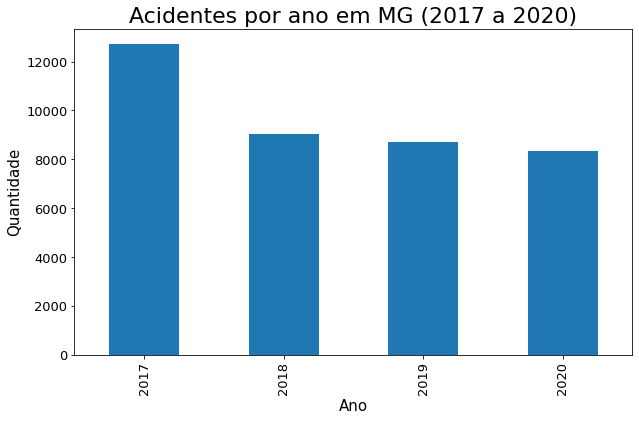

In [11]:
ax = Acidentes_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
plt.show()

In [12]:
Total_de_feridos = datatran_mg['feridos'].sum()
print("Feridos em acidentes em MG (2017 a 2020): " + str(Total_de_feridos))

Feridos em acidentes em MG (2017 a 2020): 46100


In [13]:
Feridos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'feridos': 'sum'})
print("Feridos em acidentes por ano em MG (2017 a 2020): " + str(Feridos_por_ano))

Feridos em acidentes por ano em MG (2017 a 2020):       feridos
Ano          
2017    13155
2018    11101
2019    11429
2020    10415


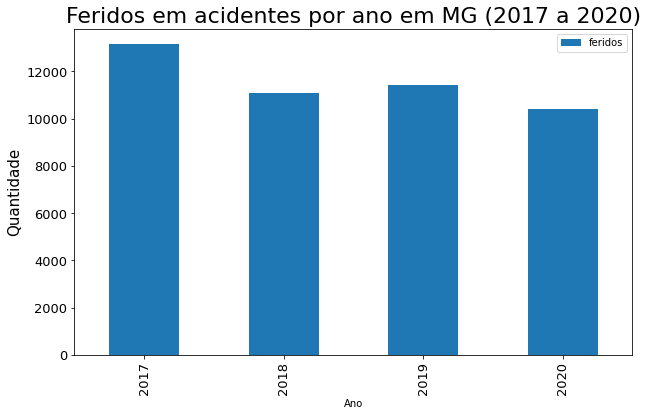

In [14]:
ax = Feridos_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Feridos em acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
plt.show()

In [15]:
Total_de_mortos = datatran_mg['mortos'].sum()
print("Mortos em acidentes em MG (2017 a 2020): " + str(Total_de_mortos))

Mortos em acidentes em MG (2017 a 2020): 2957


In [16]:
Mortos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'mortos': 'sum'})
print("Mortos em acidentes por ano em MG (2017 a 2020): " + str(Mortos_por_ano))

Mortos em acidentes por ano em MG (2017 a 2020):       mortos
Ano         
2017     869
2018     693
2019     678
2020     717


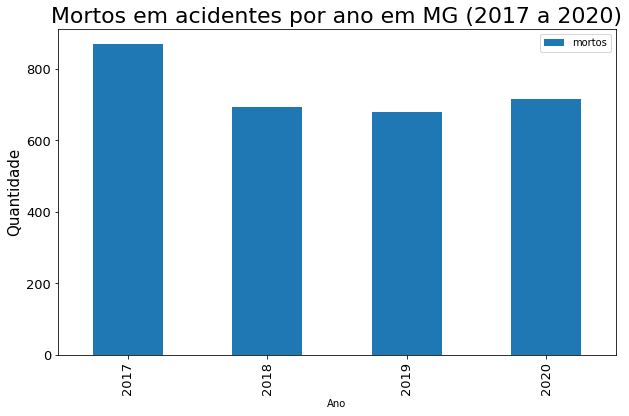

In [17]:
ax = Mortos_por_ano.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Mortos em acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
plt.show()

In [116]:
Quantidade_pessoas = datatran_mg['pessoas'].sum()
Quantidade_veiculos = datatran_mg['veiculos'].sum()
print("Envolvidos em acidentes em MG (2017 a 2020): \n Pessoas: " + str(Quantidade_pessoas) + "\n " + "Veículos envolvidos: " + str(Quantidade_veiculos))

Envolvidos em acidentes em MG (2017 a 2020): 
 Pessoas: 91789
 Veículos envolvidos: 59176


In [117]:
Quantidade_pessoas_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'pessoas': 'sum'})
print("Pessoas envolvidas por ano em MG (2017 a 2020): " + str(Quantidade_pessoas_por_ano))
Quantidade_veiculos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'veiculos': 'sum'})
print("Veículos envolvidos por ano em MG (2017 a 2020): " + str(Quantidade_veiculos_por_ano))

Pessoas envolvidas por ano em MG (2017 a 2020):       pessoas
Ano          
2017    28781
2018    21857
2019    21364
2020    19787
Veículos envolvidos por ano em MG (2017 a 2020):       veiculos
Ano           
2017     18826
2018     13717
2019     13658
2020     12975


In [56]:
Estado_fisico = acidentes_mg.groupby(['estado_fisico']).size()
print("Estado físico dos envolvidos em MG (2017 a 2020): " + str(Estado_fisico))

Estado físico dos envolvidos em MG (2017 a 2020): estado_fisico
Ileso            37895
Lesões Graves    10022
Lesões Leves     36078
Não Informado     4837
Óbito             2957
dtype: int64


In [68]:
Quantidade_envolvidos = acidentes_mg.shape[0]
perc_ileso = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Ileso'].count() / Quantidade_envolvidos) *100
perc_lesgr = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Lesões Graves'].count() / Quantidade_envolvidos) *100
perc_leslv = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Lesões Leves'].count() / Quantidade_envolvidos) *100
perc_nainf = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Não Informado'].count() / Quantidade_envolvidos) *100
perc_obito = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Óbito'].count() / Quantidade_envolvidos) *100
#print(f"% Estado físico dos envolvidos em MG (2017 a 2020): \n Ileso- {perc_ileso},\n Lesões Graves {perc_lesgr},\n Lesões Leves {perc_leslv},\n Não Informado {perc_nainf},\n Óbito {perc_obito} ")
print("% Estado físico dos envolvidos em MG (2017 a 2020): \n Ileso " + "%.2f" % perc_ileso + "\n Lesões Graves " + "%.2f" % perc_lesgr + "\n Lesões Leves " + "%.2f" % perc_leslv + "\n Não Informado " + "%.2f" % perc_nainf + "\n Óbito " + "%.2f" % perc_obito)

% Estado físico dos envolvidos em MG (2017 a 2020): 
 Ileso 41.28
 Lesões Graves 10.92
 Lesões Leves 39.31
 Não Informado 5.27
 Óbito 3.22


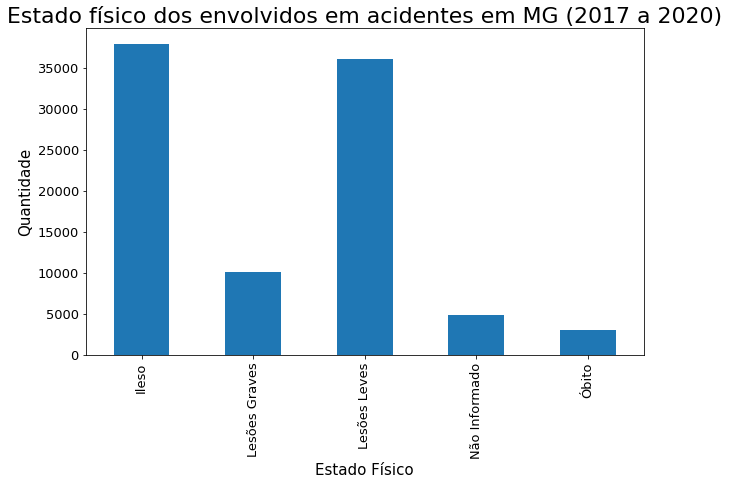

In [76]:
ax = Estado_fisico.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Estado Físico", fontsize=15);
plt.show()

In [88]:
acidentes_mg['data_inversa'] = acidentes_mg.data_inversa.astype('datetime64')
Estado_fisico_por_ano = acidentes_mg.groupby([acidentes_mg['data_inversa'].dt.year.rename('Ano'), acidentes_mg['estado_fisico']]).agg({'id': 'count'})
print("Estado físico dos envolvidos por ano em MG (2017 a 2020): " + str(Estado_fisico_por_ano))

Estado físico dos envolvidos por ano em MG (2017 a 2020):                        id
Ano  estado_fisico       
2017 Ileso          13326
     Lesões Graves   2723
     Lesões Leves   10432
     Não Informado   1431
     Óbito            869
2018 Ileso           8968
     Lesões Graves   2367
     Lesões Leves    8734
     Não Informado   1095
     Óbito            693
2019 Ileso           8189
     Lesões Graves   2523
     Lesões Leves    8906
     Não Informado   1068
     Óbito            678
2020 Ileso           7412
     Lesões Graves   2409
     Lesões Leves    8006
     Não Informado   1243
     Óbito            717


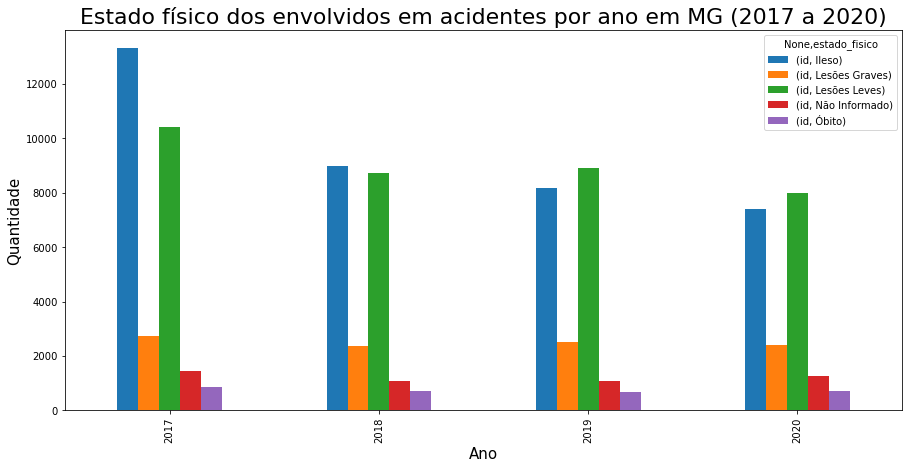

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_mg.groupby([acidentes_mg['data_inversa'].dt.year.rename('Ano'), acidentes_mg['estado_fisico']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

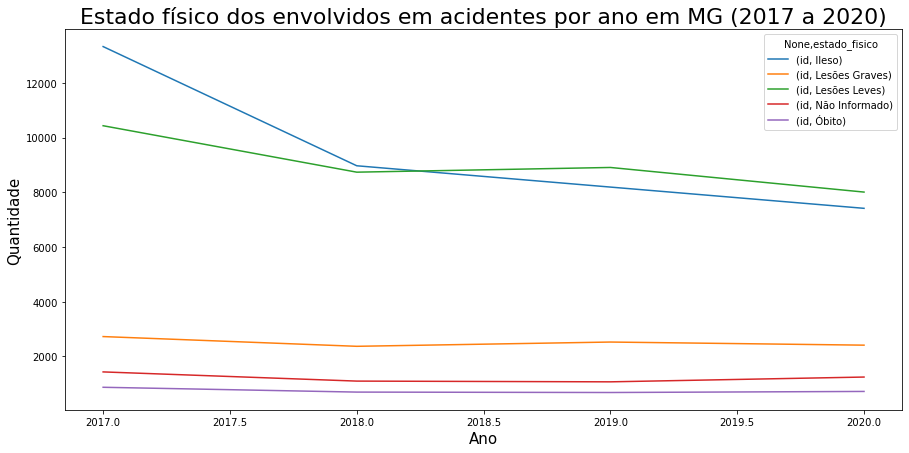

In [90]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_mg.groupby([acidentes_mg['data_inversa'].dt.year.rename('Ano'), acidentes_mg['estado_fisico']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [91]:
Classificacao_de_acidentes = datatran_mg.groupby(['classificacao_acidente']).size()
print("Classificação de acidentes em MG (2017 a 2020): " + str(Classificacao_de_acidentes))

Classificação de acidentes em MG (2017 a 2020): classificacao_acidente
Com Vítimas Fatais      2375
Com Vítimas Feridas    27966
Sem Vítimas             8494
dtype: int64


In [94]:
perc_cvfat = (datatran_mg['id'][datatran_mg['classificacao_acidente'] == 'Com Vítimas Fatais'].count() / Quantidade_acidentes) *100
perc_cvfer = (datatran_mg['id'][datatran_mg['classificacao_acidente'] == 'Com Vítimas Feridas'].count() / Quantidade_acidentes) *100
perc_sviti = (datatran_mg['id'][datatran_mg['classificacao_acidente'] == 'Sem Vítimas'].count() / Quantidade_acidentes) *100
print("% Classificação de acidentes em MG (2017 a 2020): \n Com Vítimas Fatais " + "%.2f" % perc_cvfat + "\n Com Vítimas Feridas " + "%.2f" % perc_cvfer + "\n Sem Vítimas " + "%.2f" % perc_sviti)

% Classificação de acidentes em MG (2017 a 2020): 
 Com Vítimas Fatais 6.12
 Com Vítimas Feridas 72.01
 Sem Vítimas 21.87


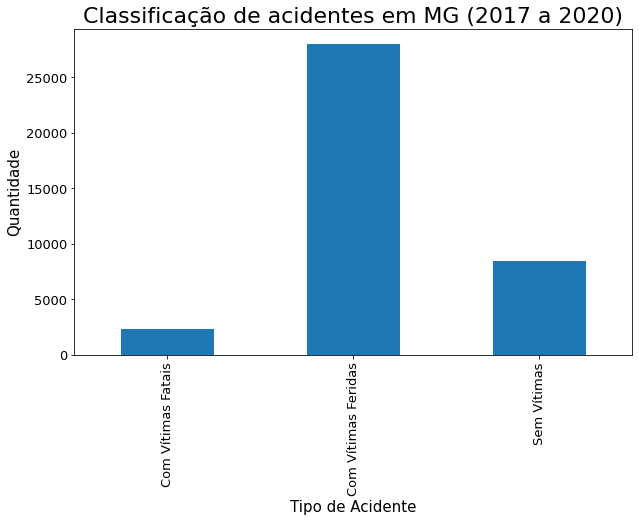

In [93]:
ax = Classificacao_de_acidentes.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Tipo de Acidente", fontsize=15);
plt.show()

In [71]:
Classificacao_de_acidentes_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['classificacao_acidente']]).agg({'id': 'count'})
print("Classificação de acidentes por ano em MG (2017 a 2020): " + str(Classificacao_de_acidentes_por_ano))

Classificação de acidentes por ano em MG (2017 a 2020):                                id
Ano  classificacao_acidente      
2017 Com Vítimas Fatais       677
     Com Vítimas Feridas     7903
     Sem Vítimas             4131
2018 Com Vítimas Fatais       551
     Com Vítimas Feridas     6671
     Sem Vítimas             1833
2019 Com Vítimas Fatais       570
     Com Vítimas Feridas     6869
     Sem Vítimas             1274
2020 Com Vítimas Fatais       577
     Com Vítimas Feridas     6523
     Sem Vítimas             1256


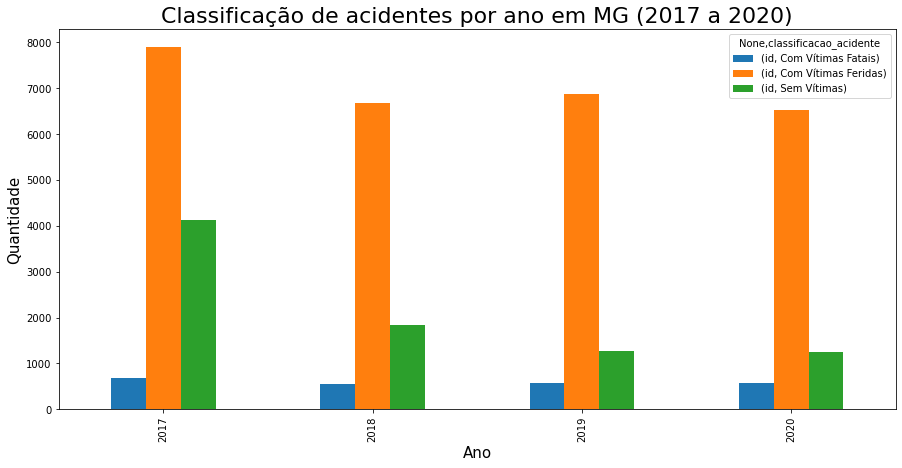

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

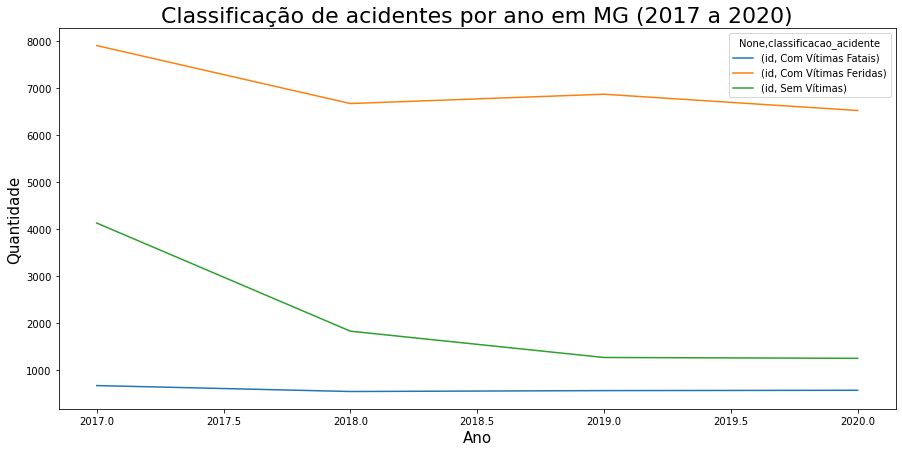

In [74]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Classificação de acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [120]:
Acidentes_por_dia_semana = datatran_mg.groupby(['dia_semana']).size().sort_values(ascending=False)
print("Acidentes por dia da semana em MG (2017 a 2020): " + str(Acidentes_por_dia_semana))

Acidentes por dia da semana em MG (2017 a 2020): dia_semana
domingo          6663
sábado           6629
sexta-feira      6034
segunda-feira    5183
quinta-feira     4866
quarta-feira     4777
terça-feira      4683
dtype: int64


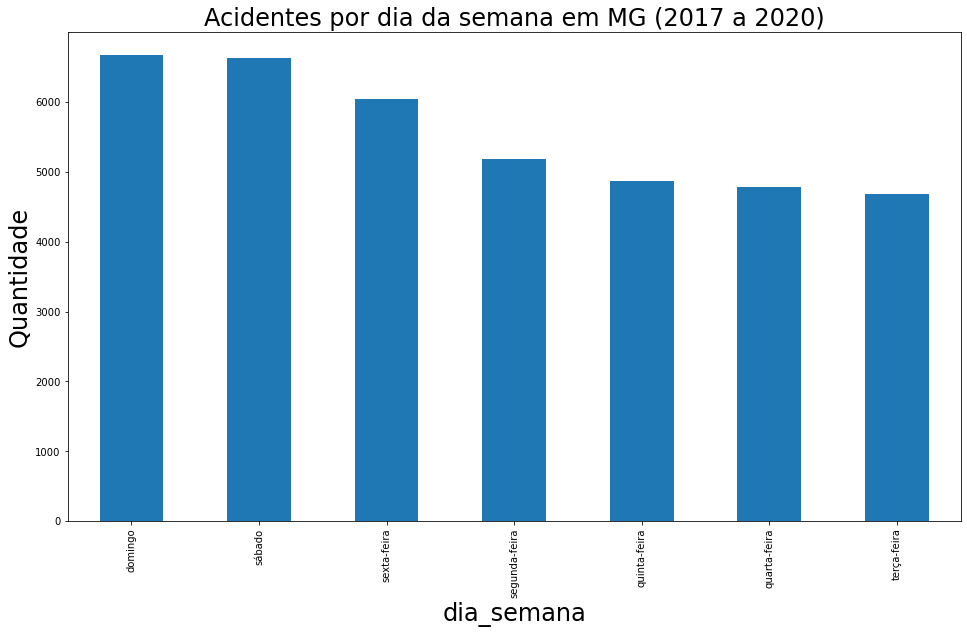

In [122]:
plt.title('Acidentes por dia da semana em MG (2017 a 2020)', fontsize=24)
plt.ylabel('Quantidade', fontsize=24)
plt.xlabel("Dia da Semana", fontsize=24)
Acidentes_por_dia_semana.plot(kind='bar')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [130]:
Acidentes_por_dia_semana_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['dia_semana']]).agg({'id': 'count'})
print("Acidentes por dia da semana por ano em MG (2017 a 2020): " + str(Acidentes_por_dia_semana_por_ano))

Acidentes por dia da semana por ano em MG (2017 a 2020):                       id
Ano  dia_semana         
2017 domingo        2195
     quarta-feira   1537
     quinta-feira   1451
     segunda-feira  1748
     sexta-feira    1997
     sábado         2296
     terça-feira    1487
2018 domingo        1548
     quarta-feira   1109
     quinta-feira   1213
     segunda-feira  1173
     sexta-feira    1358
     sábado         1522
     terça-feira    1132
2019 domingo        1497
     quarta-feira   1074
     quinta-feira   1143
     segunda-feira  1185
     sexta-feira    1349
     sábado         1391
     terça-feira    1074
2020 domingo        1423
     quarta-feira   1057
     quinta-feira   1059
     segunda-feira  1077
     sexta-feira    1330
     sábado         1420
     terça-feira     990


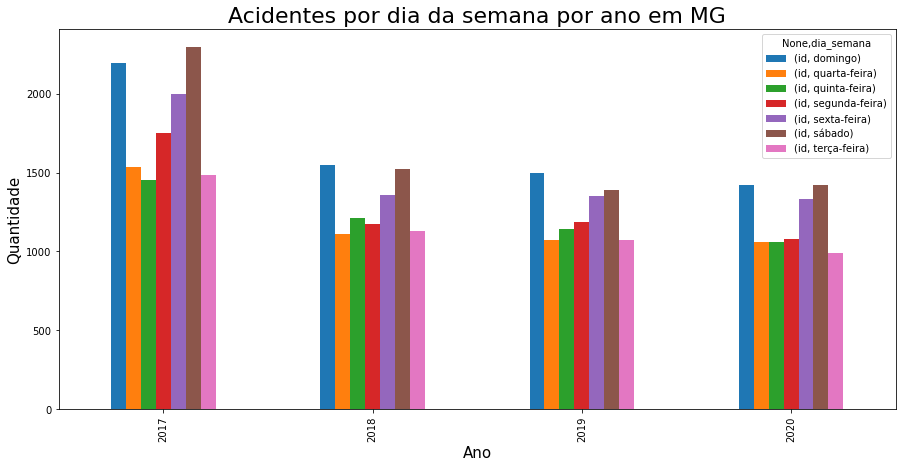

In [131]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['dia_semana']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Acidentes por dia da semana por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [138]:
datatran_mg.data_inversa = pd.to_datetime(datatran_mg.data_inversa)
Acidentes_por_mes = datatran_mg.groupby(datatran_mg['data_inversa'].dt.strftime('%B'))['id'].count().sort_values(ascending=False)
print("Acidentes por mês em MG (2017 a 2020): " + str(Acidentes_por_mes))

Acidentes por mês em MG (2017 a 2020): data_inversa
December     3838
January      3717
October      3440
February     3375
November     3220
March        3175
September    3147
July         3110
August       3084
May          2931
June         2922
April        2876
Name: id, dtype: int64


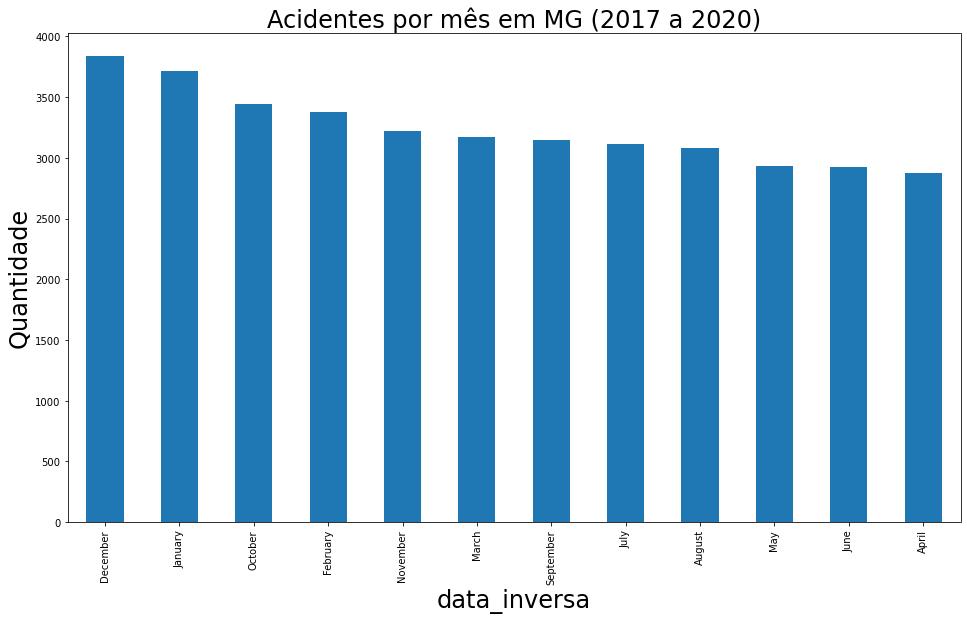

In [139]:
plt.title('Acidentes por mês em MG (2017 a 2020)', fontsize=24)
plt.ylabel('Quantidade', fontsize=24)
plt.xlabel('Mês', fontsize=24)
Acidentes_por_mes.plot(kind='bar')
plt.rcParams["figure.figsize"] = [32,18]
plt.show()

In [134]:
Acidentes_por_tipo_veiculo = acidentes_mg.groupby(['tipo_veiculo']).size().sort_values(ascending=False)
print("Tipo de veículos(2017 a 2020): " + str(Acidentes_por_tipo_veiculo))

Tipo de veículos(2017 a 2020): tipo_veiculo
Automóvel            41970
Motocicleta          13523
Caminhão-trator       9634
Caminhão              7831
Caminhonete           7812
Ônibus                5018
Camioneta             2100
Micro-ônibus          1087
Bicicleta              896
Utilitário             783
Motoneta               529
Outros                 266
Semireboque            185
Ciclomotor              64
Reboque                 26
Trator de rodas         23
Carroça-charrete        20
Triciclo                13
Não Informado            5
Trator de esteira        3
Chassi-plataforma        1
dtype: int64


In [141]:
Acidentes_por_causa = datatran_mg.groupby(['causa_acidente']).size().sort_values(ascending=False)
print("Acidentes por causa em MG (2017 a 2020): " + str(Acidentes_por_causa))

Acidentes por causa em MG (2017 a 2020): causa_acidente
Falta de Atenção à Condução                                                       12362
Velocidade Incompatível                                                            8002
Desobediência às normas de trânsito pelo condutor                                  2643
Defeito Mecânico no Veículo                                                        2404
Condutor Dormindo                                                                  2374
Não guardar distância de segurança                                                 1853
Ingestão de Álcool                                                                 1839
Pista Escorregadia                                                                 1823
Falta de Atenção do Pedestre                                                        905
Animais na Pista                                                                    815
Ultrapassagem Indevida                                          

In [100]:
Elemento_de_transito = datatran_mg.groupby(['elemento_transito']).size()
print("Acidentes por elemento de trânsito em MG (2017 a 2020): " + str(Elemento_de_transito))

Acidentes por elemento de trânsito em MG (2017 a 2020): elemento_transito
Homem      31879
Veículo     3049
Via         3907
dtype: int64


In [101]:
perc_homem = (datatran_mg['id'][datatran_mg['elemento_transito'] == 'Homem'].count() / Quantidade_acidentes) *100
perc_veic = (datatran_mg['id'][datatran_mg['elemento_transito'] == 'Veículo'].count() / Quantidade_acidentes) *100
perc_via = (datatran_mg['id'][datatran_mg['elemento_transito'] == 'Via'].count() / Quantidade_acidentes) *100
print("% Acidentes por elemento de trânsito em MG (2017 a 2020): \n Homem " + "%.2f" % perc_homem + "\n Veículo " + "%.2f" % perc_veic + "\n Via " + "%.2f" % perc_via)

% Acidentes por elemento de trânsito em MG (2017 a 2020): 
 Homem 82.09
 Veículo 7.85
 Via 10.06


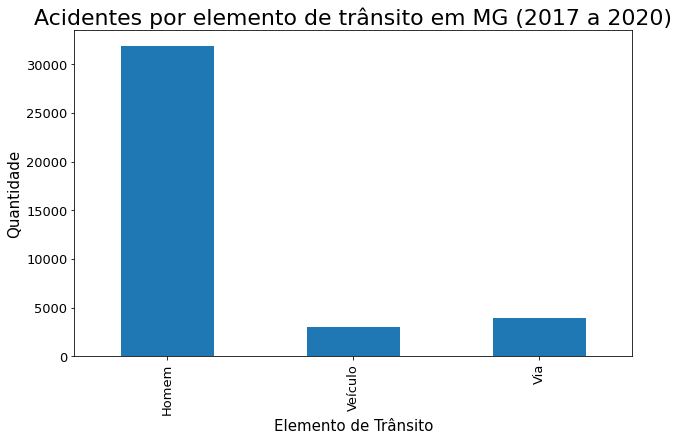

In [102]:
ax = Elemento_de_transito.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Acidentes por elemento de trânsito em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Elemento de Trânsito", fontsize=15);
plt.show()

In [96]:
Elemento_de_transito_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['elemento_transito']]).agg({'id': 'count'})
print("Acidentes por elemento de trânsito por ano em MG (2017 a 2020): " + str(Elemento_de_transito_por_ano))

Acidentes por elemento de trânsito por ano em MG (2017 a 2020):                            id
Ano  elemento_transito       
2017 Homem              10348
     Veículo              947
     Via                 1416
2018 Homem               7374
     Veículo              759
     Via                  922
2019 Homem               7252
     Veículo              692
     Via                  769
2020 Homem               6905
     Veículo              651
     Via                  800


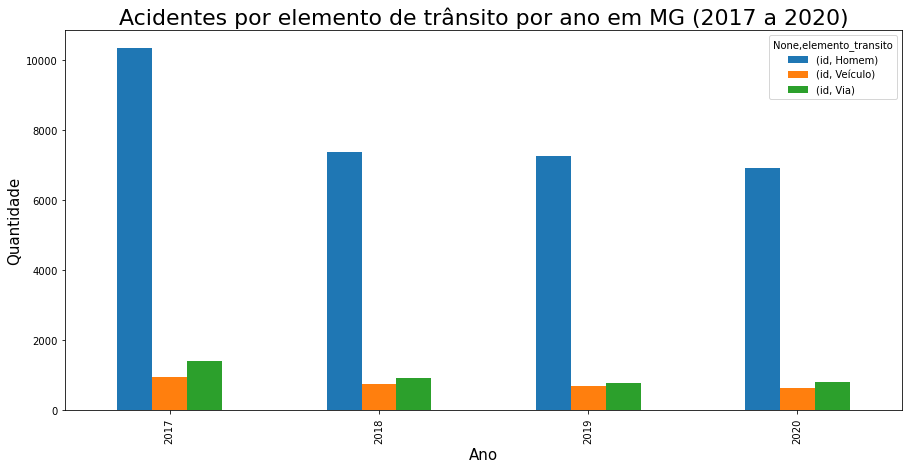

In [97]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['elemento_transito']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Acidentes por elemento de trânsito por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

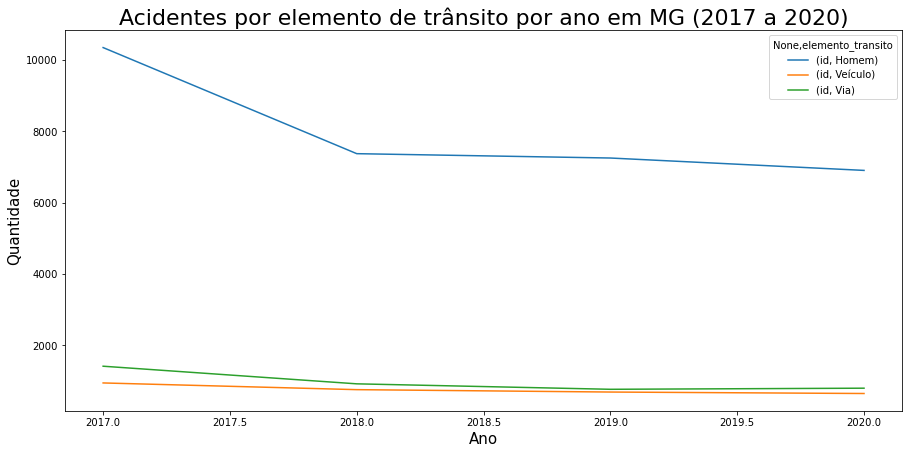

In [98]:
fig, ax = plt.subplots(figsize=(15,7))
datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['elemento_transito']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Acidentes por elemento de trânsito por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [142]:
Acidentes_por_tipo = datatran_mg.groupby(['tipo_acidente']).size().sort_values(ascending=False)
print("Acidentes por tipo em MG (2017 a 2020): " + str(Acidentes_por_tipo))

Acidentes por tipo em MG (2017 a 2020): tipo_acidente
Saída de leito carroçável          8899
Colisão traseira                   5888
Tombamento                         3880
Colisão lateral                    3554
Colisão com objeto estático        3422
Colisão transversal                3115
Colisão frontal                    2523
Capotamento                        2248
Queda de ocupante de veículo       1540
Atropelamento de Pedestre          1466
Incêndio                            697
Atropelamento de Animal             633
Engavetamento                       403
Derramamento de carga               196
Colisão com objeto em movimento     194
Danos eventuais                     176
Colisão com objeto                    1
dtype: int64


In [143]:
Acidentes_por_fase_do_dia = datatran_mg.groupby(['fase_dia']).size().sort_values(ascending=False)
print("Acidentes por fase do dia em MG (2017 a 2020): " + str(Acidentes_por_fase_do_dia))

Acidentes por fase do dia em MG (2017 a 2020): fase_dia
Pleno dia      22162
Plena Noite    12648
Amanhecer       2092
Anoitecer       1933
dtype: int64


In [151]:
Acidentes_por_condi_met = datatran_mg.groupby(['condicao_metereologica']).size().sort_values(ascending=False)
print("Acidentes por fase do dia em MG (2017 a 2020): " + str(Acidentes_por_condi_met))

Acidentes por fase do dia em MG (2017 a 2020): condicao_metereologica
Céu Claro           20726
Nublado              6698
Chuva                6591
Sol                  2803
Garoa/Chuvisco        933
Ignorado              675
Nevoeiro/Neblina      313
Vento                  93
Granizo                 2
Neve                    1
dtype: int64


In [144]:
Acidentes_por_tipo_de_pista = datatran_mg.groupby(['tipo_pista']).size().sort_values(ascending=False)
print("Acidentes por tipo de pista em MG (2017 a 2020): " + str(Acidentes_por_tipo_de_pista))

Acidentes por tipo de pista em MG (2017 a 2020): tipo_pista
Simples     19440
Dupla       18243
Múltipla     1152
dtype: int64


In [145]:
Acidentes_por_tracado_da_via = datatran_mg.groupby(['tracado_via']).size().sort_values(ascending=False)
print("Acidentes por tipo de traçado em MG (2017 a 2020): " + str(Acidentes_por_tracado_da_via))

Acidentes por tipo de traçado em MG (2017 a 2020): tracado_via
Reta                     18865
Curva                    11141
Não Informado             5386
Interseção de vias        1175
Desvio Temporário          824
Rotatória                  499
Retorno Regulamentado      481
Ponte                      211
Viaduto                    203
Túnel                       50
dtype: int64


In [152]:
Acidentes_por_uso_solo = datatran_mg.groupby(['uso_solo']).size().sort_values(ascending=False)
print("Acidentes por tipo de traçado em MG (2017 a 2020): " + str(Acidentes_por_uso_solo))

Acidentes por tipo de traçado em MG (2017 a 2020): uso_solo
Rural     27435
Urbano    11400
dtype: int64


In [146]:
Acidentes_por_br = datatran_mg.groupby(['br']).size().sort_values(ascending=False)
print("Acidentes por BR em MG (2017 a 2020): " + str(Acidentes_por_br))

Acidentes por BR em MG (2017 a 2020): br
381    12291
40      7549
116     4960
262     4315
365     2702
50      2248
153     1064
251      949
267      815
459      462
354      356
356      353
146      351
135      209
364      183
452       19
451        3
265        3
352        1
122        1
120        1
dtype: int64


In [147]:
Acidentes_por_sexo_envolvido = acidentes_mg.groupby(['sexo']).size().sort_values(ascending=False)
print("Acidentes por sexo dos envolvidos em MG (2017 a 2020): " + str(Acidentes_por_sexo_envolvido))

Acidentes por sexo dos envolvidos em MG (2017 a 2020): sexo
Masculino        65633
Feminino         20793
Não Informado     4980
Ignorado           383
dtype: int64


In [149]:
Acidentes_por_sexo_e_envolvido = acidentes_mg.groupby(['tipo_envolvido','sexo']).size()
print("Acidentes por sexo por envolvido em MG (2017 a 2020): " + str(Acidentes_por_sexo_e_envolvido))

Acidentes por sexo por envolvido em MG (2017 a 2020): tipo_envolvido  sexo         
Cavaleiro       Feminino             1
                Masculino           25
                Não Informado        1
Condutor        Feminino          4980
                Ignorado           338
                Masculino        51556
                Não Informado     2209
Passageiro      Feminino         15435
                Ignorado            43
                Masculino        12821
                Não Informado      125
Pedestre        Feminino           377
                Ignorado             2
                Masculino         1231
                Não Informado       13
Testemunha      Não Informado     2632
dtype: int64


In [ ]:
#Geração de indicadores relacionados aos acidentes de MG

#Classificação por gravidade dos acidentes
#print(str(datatran_mg.groupby(['br','classificacao_acidente']).size()))
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
class_acid = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br'], datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).reset_index())
class_acid.rename(columns={'br':'BR'}, inplace=True)
class_acid.rename(columns={'id':'Acidentes'}, inplace=True)
class_acid['Sem_Vitimas'] = '0'
class_acid['Com_Vitimas_Feridas'] = '0'
class_acid['Com_Vitimas_Fatais'] = '0'
class_acid['BR'] = class_acid.BR.astype('object')
class_acid['Sem_Vitimas'] = class_acid.Sem_Vitimas.astype('int64')
class_acid['Com_Vitimas_Feridas'] = class_acid.Com_Vitimas_Feridas.astype('int64')
class_acid['Com_Vitimas_Fatais'] = class_acid.Com_Vitimas_Fatais.astype('int64')
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Fatais', 'Com_Vitimas_Fatais'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Feridas', 'Com_Vitimas_Feridas'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Sem Vítimas', 'Sem_Vitimas'] = class_acid['Acidentes']
class_acid.drop(columns=['classificacao_acidente'], axis=1, inplace=True)
class_acid.drop(columns=['Acidentes'], axis=1, inplace=True)
class_acidentes = pd.DataFrame(class_acid.groupby([class_acid['Ano'], class_acid['BR']]).agg({'Sem_Vitimas' : 'sum', 'Com_Vitimas_Feridas' : 'sum', 'Com_Vitimas_Fatais' : 'sum'}).reset_index())
#class_acidentes.head(10)

#Extensões por trecho de BR
snv_2017_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\SNV_201801B_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2018_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\snv_201903a_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2019_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\SNV_202001A_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2020_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\SNV_202101A_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2017_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final'], axis=1, inplace=True)
snv_2018_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final'], axis=1, inplace=True)
snv_2019_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final','Superfície Federal'], axis=1, inplace=True)
snv_2020_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final','Superfície Federal'], axis=1, inplace=True)

#Extensões por BR
snv_2017_mg_br = pd.DataFrame(snv_2017_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2018_mg_br = pd.DataFrame(snv_2018_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2019_mg_br = pd.DataFrame(snv_2019_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2020_mg_br = pd.DataFrame(snv_2020_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2017_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2017_mg_br['Ano'] = '2017'
snv_2018_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2018_mg_br['Ano'] = '2018'
snv_2019_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2019_mg_br['Ano'] = '2019'
snv_2020_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2020_mg_br['Ano'] = '2020'

#Excluindo BRs sem acidentes registrados
snv_mg_br = pd.concat([snv_2017_mg_br,snv_2018_mg_br,snv_2019_mg_br,snv_2020_mg_br], join="inner")
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[0,4,5,9,11,13,15,16,21,22,24,25,26,27,28,29,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[19,20,24,26,28,30,31,36,37,39,40,41,42,43,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[37,40,42,46,47,52,53,55,56,57,58,59,60,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[53,54,55,58,60,64,70,71,73,74,75,76,77,78,79,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
#print(snv_mg_br)
snv_mg_br.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\snv_mg_br.csv", index=False)

#Preparação para a geração dos indicadores
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
#datatran_mg.info()
temp_mg = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br']]).agg({'id': 'count', 'feridos' : 'sum', 'mortos' : 'sum', 'pessoas' : 'sum'}).reset_index())
temp_mg.rename(columns={'id':'Acidentes'}, inplace=True)
temp_mg.rename(columns={'feridos':'Feridos'}, inplace=True)
temp_mg.rename(columns={'mortos':'Mortes'}, inplace=True)
temp_mg.rename(columns={'pessoas':'Envolvidos'}, inplace=True)
temp_mg.rename(columns={'br':'BR'}, inplace=True)
temp_mg['BR'] = temp_mg.BR.astype('object')
#print(temp_mg)
snv_mg_br.drop(columns=['BR'], axis=1, inplace=True)
temp_mg.drop(columns=['Ano'], axis=1, inplace=True)
temp_indices = pd.DataFrame(pd.concat([snv_mg_br, temp_mg], axis=1, join="inner")).reset_index()
temp_indices.drop(columns=['index'], axis=1, inplace=True)
#print(temp_indices)
#temp_indices.info()

#Gerando os indicadores - dados de 2017
temp_2017 = temp_indices.loc[(temp_indices['Ano'] == "2017")]
#print(temp_2017.loc[temp_2017['Ano'] == "2017", 'Extensão'].sum())
temp_2017['%_Extensão_BR'] = (temp_2017['Extensão'] / temp_2017['Extensão'].sum())*100
temp_2017['%_Acidente_BR'] = (temp_2017['Acidentes'] / temp_2017['Acidentes'].sum())*100
temp_2017['%_Feridos_BR'] = (temp_2017['Feridos'] / temp_2017['Feridos'].sum())*100
temp_2017['%_Mortes_BR'] = (temp_2017['Mortes'] / temp_2017['Mortes'].sum())*100
temp_2017['Acidente_KM'] = (temp_2017['Acidentes'] / temp_2017['Extensão'])
temp_2017['Mortes_KM'] = (temp_2017['Mortes'] / temp_2017['Extensão'])
temp_2017 = temp_2017.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2017.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2017)
#temp_2017.head(50)

#Gerando os indicadores - dados de 2018
temp_2018 = temp_indices.loc[(temp_indices['Ano'] == "2018")]
#print(temp_2018.loc[temp_2018['Ano'] == "2018", 'Extensão'].sum())
temp_2018['%_Extensão_BR'] = (temp_2018['Extensão'] / temp_2018['Extensão'].sum())*100
temp_2018['%_Acidente_BR'] = (temp_2018['Acidentes'] / temp_2018['Acidentes'].sum())*100
temp_2018['%_Feridos_BR'] = (temp_2018['Feridos'] / temp_2018['Feridos'].sum())*100
temp_2018['%_Mortes_BR'] = (temp_2018['Mortes'] / temp_2018['Mortes'].sum())*100
temp_2018['Acidente_KM'] = (temp_2018['Acidentes'] / temp_2018['Extensão'])
temp_2018['Mortes_KM'] = (temp_2018['Mortes'] / temp_2018['Extensão'])
temp_2018 = temp_2018.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2018.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2018)
#temp_2018.head(50)

#Gerando os indicadores - dados de 2019
temp_2019 = temp_indices.loc[(temp_indices['Ano'] == "2019")]
#print(temp_2019.loc[temp_2019['Ano'] == "2019", 'Extensão'].sum())
temp_2019['%_Extensão_BR'] = (temp_2019['Extensão'] / temp_2019['Extensão'].sum())*100
temp_2019['%_Acidente_BR'] = (temp_2019['Acidentes'] / temp_2019['Acidentes'].sum())*100
temp_2019['%_Feridos_BR'] = (temp_2019['Feridos'] / temp_2019['Feridos'].sum())*100
temp_2019['%_Mortes_BR'] = (temp_2019['Mortes'] / temp_2019['Mortes'].sum())*100
temp_2019['Acidente_KM'] = (temp_2019['Acidentes'] / temp_2019['Extensão'])
temp_2019['Mortes_KM'] = (temp_2019['Mortes'] / temp_2019['Extensão'])
temp_2019 = temp_2019.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2019.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2019)
#temp_2019.head(50)

#Gerando os indicadores - dados de 2020
temp_2020 = temp_indices.loc[(temp_indices['Ano'] == "2020")]
#print(temp_2019.loc[temp_2020['Ano'] == "2020", 'Extensão'].sum())
temp_2020['%_Extensão_BR'] = (temp_2020['Extensão'] / temp_2020['Extensão'].sum())*100
temp_2020['%_Acidente_BR'] = (temp_2020['Acidentes'] / temp_2020['Acidentes'].sum())*100
temp_2020['%_Feridos_BR'] = (temp_2020['Feridos'] / temp_2020['Feridos'].sum())*100
temp_2020['%_Mortes_BR'] = (temp_2020['Mortes'] / temp_2020['Mortes'].sum())*100
temp_2020['Acidente_KM'] = (temp_2020['Acidentes'] / temp_2020['Extensão'])
temp_2020['Mortes_KM'] = (temp_2020['Mortes'] / temp_2020['Extensão'])
temp_2020 = temp_2020.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2020.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2020)
#temp_2020.head(50)

#Consolidando os indicadores de acidentalidade em um único dataframe
indices_temp = pd.concat([temp_2017, temp_2018, temp_2019, temp_2020], sort = False).reset_index()
indices_temp.drop(columns=['index'], axis=1, inplace=True)
class_acidentes.drop(columns=['Ano'], axis=1, inplace=True)
class_acidentes.drop(columns=['BR'], axis=1, inplace=True)
indices_acidentes = pd.concat([indices_temp, class_acidentes], axis=1, sort = False).reset_index()
indices_acidentes.drop(columns=['index'], axis=1, inplace=True)
indices_acidentes['Gravidade'] = (indices_acidentes['Sem_Vitimas'] + (5 * indices_acidentes['Com_Vitimas_Feridas'])+(13 * indices_acidentes['Com_Vitimas_Fatais'])) / indices_acidentes['Extensão']
indices_acidentes.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\indices_acidentes.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [112]:
#Relação dos indicadores de acidentalidade
indices_acidentes.head(66)

,Ano,BR,Extensão,Acidentes,Envolvidos,Feridos,Mortes,%_Extensão_BR,%_Acidente_BR,Acidente_KM,%_Feridos_BR,%_Mortes_BR,Mortes_KM,Sem_Vitimas,Com_Vitimas_Feridas,Com_Vitimas_Fatais,Gravidade
0,2017,40,893.90,2374,5479,2494,145,8.7231,18.6767,2.6558,18.9586,16.6858,0.1622,720,1544,110,11.0415
1,2017,50,269.80,673,1333,619,13,2.6328,5.2946,2.4944,4.7054,1.4960,0.0482,236,426,11,9.2995
2,2017,116,818.10,1626,3749,1841,170,7.9834,12.7921,1.9875,13.9947,19.5627,0.2078,385,1111,130,9.3265
3,2017,135,834.70,208,553,260,34,8.1454,1.6364,0.2492,1.9764,3.9125,0.0407,58,125,25,1.2076
4,2017,146,726.80,114,256,128,6,7.0925,0.8969,0.1569,0.9730,0.6904,0.0083,36,72,6,0.6522
5,2017,153,239.90,379,855,362,29,2.3411,2.9817,1.5798,2.7518,3.3372,0.1209,144,210,25,6.3318
6,2017,251,1015.70,282,736,340,50,9.9117,2.2186,0.2776,2.5846,5.7537,0.0492,87,162,33,1.3055
7,2017,262,1082.90,1381,3012,1495,97,10.5675,10.8646,1.2753,11.3645,11.1623,0.0896,399,902,80,5.4936
8,2017,267,534.70,293,759,397,30,5.2179,2.3051,0.5480,3.0179,3.4522,0.0561,63,205,25,2.6426
9,2017,354,774.50,106,241,90,4,7.5579,0.8339,0.1369,0.6842,0.4603,0.0052,35,67,4,0.5449
